# PRCP - 1027 - Skin Disorder Classification

## Problem Statement 

**Task 1:** Prepare a complete data analysis report on the given data.

**Task 2:** Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

**Task3:** Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


## Dataset Information

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. 
**The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.** 

Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the **histopathological features(Histopathology means using a microscope to look at human tissue to see if it has signs of diseases, damage, or other abnormalities. Histology is the study of tissues, and pathology is the study of disease)** are determined by an analysis of the samples under a microscope.

In the dataset constructed for this domain, the **family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise.**

The age feature simply represents the age of the patient.

**Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.**

### Required Library Import

In [1]:
# for data manupulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Data Reading

In [2]:
df = pd.read_csv('skin_disorder.csv')
df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

### Basic Checks

In [3]:
# columns in the dataset
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [4]:
# shape of dataset
df.shape

(366, 35)

In [5]:
# Top 5 rows of dataset
df.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [6]:
# Bottom 5 rows of dataset
df.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [7]:
# Basic information about columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

Except the age feature(object type), all the features are of integer type 

In [8]:
# Unique values of each features 
for i in df.columns:
    print(i,df[i].unique())

erythema [2 3 1 0]
scaling [2 3 1 0]
definite_borders [0 3 2 1]
itching [3 2 0 1]
koebner_phenomenon [0 1 2 3]
polygonal_papules [0 3 2 1]
follicular_papules [0 3 1 2]
oral_mucosal_involvement [0 3 2 1]
knee_and_elbow_involvement [1 0 3 2]
scalp_involvement [0 1 2 3]
family_history [0 1]
melanin_incontinence [0 1 2 3]
eosinophils_in_the_infiltrate [0 2 1]
PNL_infiltrate [0 1 3 2]
fibrosis_of_the_papillary_dermis [0 3 1 2]
exocytosis [3 1 0 2]
acanthosis [2 3 1 0]
hyperkeratosis [0 2 1 3]
parakeratosis [0 2 3 1]
clubbing_of_the_rete_ridges [0 2 1 3]
elongation_of_the_rete_ridges [0 2 3 1]
thinning_of_the_suprapapillary_epidermis [0 2 3 1]
spongiform_pustule [0 2 1 3]
munro_microabcess [0 1 2 3]
focal_hypergranulosis [0 2 3 1]
disappearance_of_the_granular_layer [0 3 2 1]
vacuolisation_and_damage_of_basal_layer [0 2 3 1]
spongiosis [3 0 2 1]
saw-tooth_appearance_of_retes [0 2 3 1]
follicular_horn_plug [0 1 2 3]
perifollicular_parakeratosis [0 2 1 3]
inflammatory_monoluclear_inflitrate [1

### Features Information 

### Clinical Attributes:
1. **Erythema** - A skin reaction that can be triggered by an infection or some medicines
2. **Scaling** - The loss of the outer layer of the epidermis in large, scale-like flakes
3. **Definite Borders** - Border description of skin lesions, i.e, areas of  skin that are different from the skin around them.
4. **itching** - Of, relating to, or characterized by an irritating sensation of the skin.
5. **Koebner Phenomenon** -  Also called the Koebner response or the isomorphic response,  is the appearance of skin lesions on lines of trauma.(Source - Wikipedia)
6. **Polygonal Papules** - A papule is a small, well-defined bump in the skin. It may have a rounded, pointed or flat top.
7. **Follicular Papules** - Individual papules that include a central hair follicle. (Source -USA National Centre of Biotechnology Information)

8. **Oral mucosal involvement** -Oral involvement generally consists of mucosal ulceration associated with lesions of the underlying bone. (Source -USA National Centre of Biotechnology Information)

9. **Knee and elbow involvement** - Skin complexities on knee and elbow
10. **Scalp involvement** - Skin complexities on Scalp
11. **Family history, (0 or 1)** - If any of these diseases has been observed in the family.

    **Age** - (Have linear values)

### Histopathological Attributes:

12. **Melanin_incontinence** - Pigmentary incontinence, which is a phenomenon observed in some inflammatory skin disorders. Clinically it may be seen as a slate-colored pigmentation. Histologically it is seen as an accumulation of melanin in the upper dermis (Source -USA National Centre of Biotechnology Information).
13. **Eosinophils in the infiltrate** - Eosinophils are a kind of white blood cell that helps fight disease. Eosinophil infiltration is a common finding in a broad spectrum of skin diseases, despite the fact that the skin is devoid of eosinophils under physiologic conditions.(Source -USA National Centre of Biotechnology Information).
14. **PNL infiltrate** - Pure Neuritic Leprosy(PNL)
15. **Fibrosis of the papillary dermis** - Overgrowth, hardening, and/or scarring of various tissues and  excess deposition of extracellular matrix components including collagen in the thin top layer of the dermis (the inner layer of the skin), i.e, papillary dermis.(Source -USA National Centre of Biotechnology Information).
16. **Exocytosis** -  Exocytosis is infiltration of the epidermis by inflammatory or circulating blood cells. Pathological changes may arise in epidermis, dermis and/or subcutaneous tissue (tissues under the skin).
17. **Acanthosis** - A skin condition that causes a dark discoloration in body folds and creases. It typically affects the armpits, groin and neck. 
18. **Hyperkeratosis** - The increased thickness of the stratum corneum, the outer layer of the skin. Stratum corneum is composed of multiple layers of keratinocyte bodies that, during maturation, produced keratin and subsequently have lost their nucleus and cytoplasmic organelles.
19. **Parakeratosis** - Incomplete maturation of epidermal keratinocytes, resulting in abnormal retention of nuclei in the stratum corneum. It occurs in many diseases of the skin, particularly in psoriasis.
20. **Clubbing of the rete ridges** - Rete ridges are the epithelial extensions that project into the underlying connective tissue in both skin and mucous membranes.
21. **Elongation of the rete ridges** -  Mechanical stretching stimulates growth of the basal layer and rete ridges in the epidermis.
22. **Thinning of the suprapapillary epidermis** - Thinning of the epidermis over the papillary dermis.
23. **Spongiform pustule** - Spongy vesicles (pustules) filled with pus (neutrophils)
24. **Munro microabcess** - Small vesicles filled with neutrophils in the epidermis.
25. **Focal hypergranulosis** - Focal thickening of the granular layer of the epidermis.
26. **Disappearance of the granular layer** - Disappearance of the granular layer of the epidermis.
27. **Vacuolisation and damage of basal layer** - Formation of spongy cavities as a result of damage to the basal layer.
28. **Spongiosis** -  Edema between epidermis cells.
29. **Saw-tooth appearance of retes** - Formation of rete ridges in a sawtooth appearance.
30. **Follicular horn plug** - Formation of plugs in hair follicles. 
31. **Perifollicular parakeratosis** -  Presence of nucleated cells around the hair follicle in the corneum layer.
32. **Inflammatory mononuclear infiltrate** - Migration of mononuclear inflammatory cells.
33. **Band-like infiltrate** - Migration of white blood cells in band appearance



### Class of Diseases

The diseases in this group are

1. **Psoriasis**,
2. **Seboreic Dermatitis**,
3. **Lichen Planus**,
4. **Pityriasis Rosea**,
5. **Cronic Dermatitis**,
6. **Pityriasis Rubra Pilaris**.

In [9]:
# some information about numeric datatype features
df.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  ...  focal_hypergranulosis  \
count         366.000000  ...             366.000000   
mean            0.519126  ...               0.393443   
std             0.905639  ...               0.849406   
min             0.000000  ...               0.000000   
25%             0.000000  ...               0.000000   
50%             0.000000  ...               0.000000   
75%             1.000000  ...               0.000000   
max             3.000000  ...               3.000000   

       disappearance_of_the_granular_layer  \
count                           366.000000   
mean                              0.464481   
std                               0.864899   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               1.000000   
max                               3.000000   

       vacuolisation_and_damage_of_basal_layer  spongiosis  \
count                               366.000000  366.000000   
mean                                  0.456284    0.953552   
std                                   0.954873    1.130172   
min                                   0.000000    0.000000   
25%                                   0.000000    0.000000   
50%                                   0.000000    0.000000   
75%                                   0.000000    2.000000   
max                                   3.000000    3.000000   

       saw-tooth_appearance_of_retes  follicular_horn_plug  \
count                     366.000000            366.000000   
mean                        0.453552              0.103825   
std                         0.954744              0.450433   
min                         0.000000              0.000000   
25%                         0.000000              0.000000   
50%                         0.000000              0.000000   
75%                         0.000000              0.000000   
max                         3.000000              3.000000   

       perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
count                    366.000000                           366.000000   
mean                       0.114754                             1.8661

In [10]:
# some information about objective datatype features
df.describe(include='O')

Age
count   366
unique   61
top      40
freq     17

In [11]:
# Missing value check
df.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

No Missing value in dataset

### Data Manipulation

In [12]:
# changing datatype of age feature
df['Age']=pd.to_numeric(df['Age'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [14]:
pd.set_option('display.max_rows',None)

In [15]:
df

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   3   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   3   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   3   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   3   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   3   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

Since there is no missing value in dataset but there is some rows in age column with '?'.So we have to treat these rows.

In [16]:
df_features = df.drop('class',axis=1)

In [17]:
df_features.shape

(366, 34)

In [18]:
df.describe().T

count       mean        std  min  \
erythema                                  366.0   2.068306   0.664753  0.0   
scaling                                   366.0   1.795082   0.701527  0.0   
definite_borders                          366.0   1.549180   0.907525  0.0   
itching                                   366.0   1.366120   1.138299  0.0   
koebner_phenomenon                        366.0   0.633880   0.908016  0.0   
polygonal_papules                         366.0   0.448087   0.957327  0.0   
follicular_papules                        366.0   0.166667   0.570588  0.0   
oral_mucosal_involvement                  366.0   0.377049   0.834147  0.0   
knee_and_elbow_involvement                366.0   0.614754   0.982979  0.0   
scalp_involvement                         366.0   0.519126   0.905639  0.0   
family_history                            366.0   0.125683   0.331946  0.0   
melanin_incontinence                      366.0   0.404372   0.869818  0.0   
eosinophils_in_the_infiltrate             366.0   0.139344   0.411790  0.0   
PNL_infiltrate                            366.0   0.546448   0.815451  0.0   
fibrosis_of_the_papillary_dermis          366.0   0.336066   0.853139  0.0   
exocytosis                                366.0   1.368852   1.104418  0.0   
acanthosis                                366.0   1.956284   0.712512  0.0   
hyperkeratosis                            366.0   0.527322   0.757116  0.0   
parakeratosis                             366.0   1.289617   0.917562  0.0   
clubbing_of_the_rete_ridges               366.0   0.663934   1.056829  0.0   
elongation_of_the_rete_ridges             366.0   0.991803   1.162161  0.0   
thinning_of_the_suprapapillary_epidermis  366.0   0.633880   1.034924  0.0   
spongiform_pustule                        366.0   0.295082   0.670578  0.0   
munro_microabcess                         366.0   0.363388   0.759721  0.0   
focal_hypergranulosis                     366.0   0.393443   0.849406  0.0   
disappearance_of_the_granular_layer       366.0   0.464481   0.864899  0.0   
vacuolisation_and_damage_of_basal_layer   366.0   0.456284   0.954873  0.0   
spongiosis                                366.0   0.953552   1.130172  0.0   
saw-tooth_appearance_of_retes             366.0   0.453552   0.954744  0.0   
follicular_horn_plug                      366.0   0.103825   0.450433  0.0   
perifollicular_parakeratosis              366.0   0.114754   0.488723  0.0   
inflammatory_monoluclear_inflitrate       366.0   1.866120   0.726108  0.0   
band-like_infiltrate                      366.0   0.554645   1.105908  0.0   
Age                                       358.0  36.296089  15.324557  0.0   
class                                     366.0   2.803279   1.597803  1.0   

                                           25%   50%    75%   max  
erythema                                   2.0   2.0   2.00   3.0  
scaling                                    1.0   2.0   2.00   3.0  
definite_borders                           1.0   2.0   2.00   3.0  
itching                                    0.0   1.0   2.00   3.0  
koebner_phenomenon                         0.0   0.0   1.00   3.0  
polygonal_papules                          0.0   0.0   0.00   3.0  
follicular_papules                         0.0   0.0   0.00   3.0  
oral_mucosal_involvement                   0.0   0.0   0.00   3.0  
knee_and_elbow_involvement                 0.0   0.0   1.00   3.0  
scalp_involvement                          0.0   0.0   1.00   3.0  
family_history                             0.0   0.0   0.00   1.0  
melanin_incontinence                       0.0   0.0   0.00   3.0  
eosinophils_in_the_infiltrate              0.0   0.0   0.00   2.0  
PNL_infiltrate                             0.0   0.0   1.00   3.0  
fibrosis_of_the_papillary_dermis           0.0   0.0   0.00   3.0  
exocytosis                                 0.0   2.0   2.00   3.0  
acanthosis                                 2.0   2.0   2.00   3.0  
hyperkera

In [19]:
df.loc[df['Age']==0.0]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
119         1        1                 1        1                   1   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
119                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
119                           2                  2  ...   

     disappearance_of_the_granular_layer  \
119                                    0   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
119                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
119                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
119                             0                                    0   

     band-like_infiltrate  Age  class  
119                     2  0.0      1  

[1 rows x 35 columns]

### Exploratory Data Analysis

In [20]:
data_eda = df.copy()

In [21]:
data_eda['Age'].max()

75.0

In [22]:
# Patients are only upto age 75.

#### Renaming Some columns for EDA

In [23]:
data_eda.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate   Age  class  
0                     0  55.0      2  
1                     0   8.0      1  
2                     3  26.0      3  
3                     0  40.0      1  
4                     3  45.0      3  

[5 rows x 35 columns]

In [24]:
data_eda['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [25]:
## renaming the sub classes of class column
# data_eda['class'] = data_eda['class'].replace({1 : 'Psoriasis', 2 : 'Seboreic Dermatitis',
#                3 : 'Lichen Planus', 4 : 'Pityriasis Rosea',
#                5 : 'Cronic Dermatitis', 6 : 'Cronic Dermatitis'})

In [26]:
data_eda['class'].replace([1,2,3,4,5,6],['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea','Cronic Dermatitis','Pityriasis Rubra Pilaris'],inplace=True)

In [27]:
data_eda['class'].value_counts().index

Index(['Psoriasis', 'Lichen Planus', 'Seboreic Dermatitis',
       'Cronic Dermatitis', 'Pityriasis Rosea', 'Pityriasis Rubra Pilaris'],
      dtype='object')

In [28]:
data_eda['class'].unique()

array(['Seboreic Dermatitis', 'Psoriasis', 'Lichen Planus',
       'Cronic Dermatitis', 'Pityriasis Rosea',
       'Pityriasis Rubra Pilaris'], dtype=object)

In [29]:
## renaming sub classes of family_history column
data_eda['family_history'].replace([0,1], ['Not Observed', 'Observed'],inplace=True)

In [30]:
data_eda['family_history'].value_counts()

Not Observed    320
Observed         46
Name: family_history, dtype: int64

In [31]:
data_eda.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

  disappearance_of_the_granular_layer  \
0                                   0   
1                                   0   
2                                   0   
3                                   3   
4                                   2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate   Age                class  
0                     0  55.0  Seboreic Dermatitis  
1                     0   8.0            Psoriasis  
2                     3  26.0        Lichen Planus  
3                     0  40.0            Psoriasis  
4                     3  45.0        Lichen Planus  

[5 rows x 35 columns]

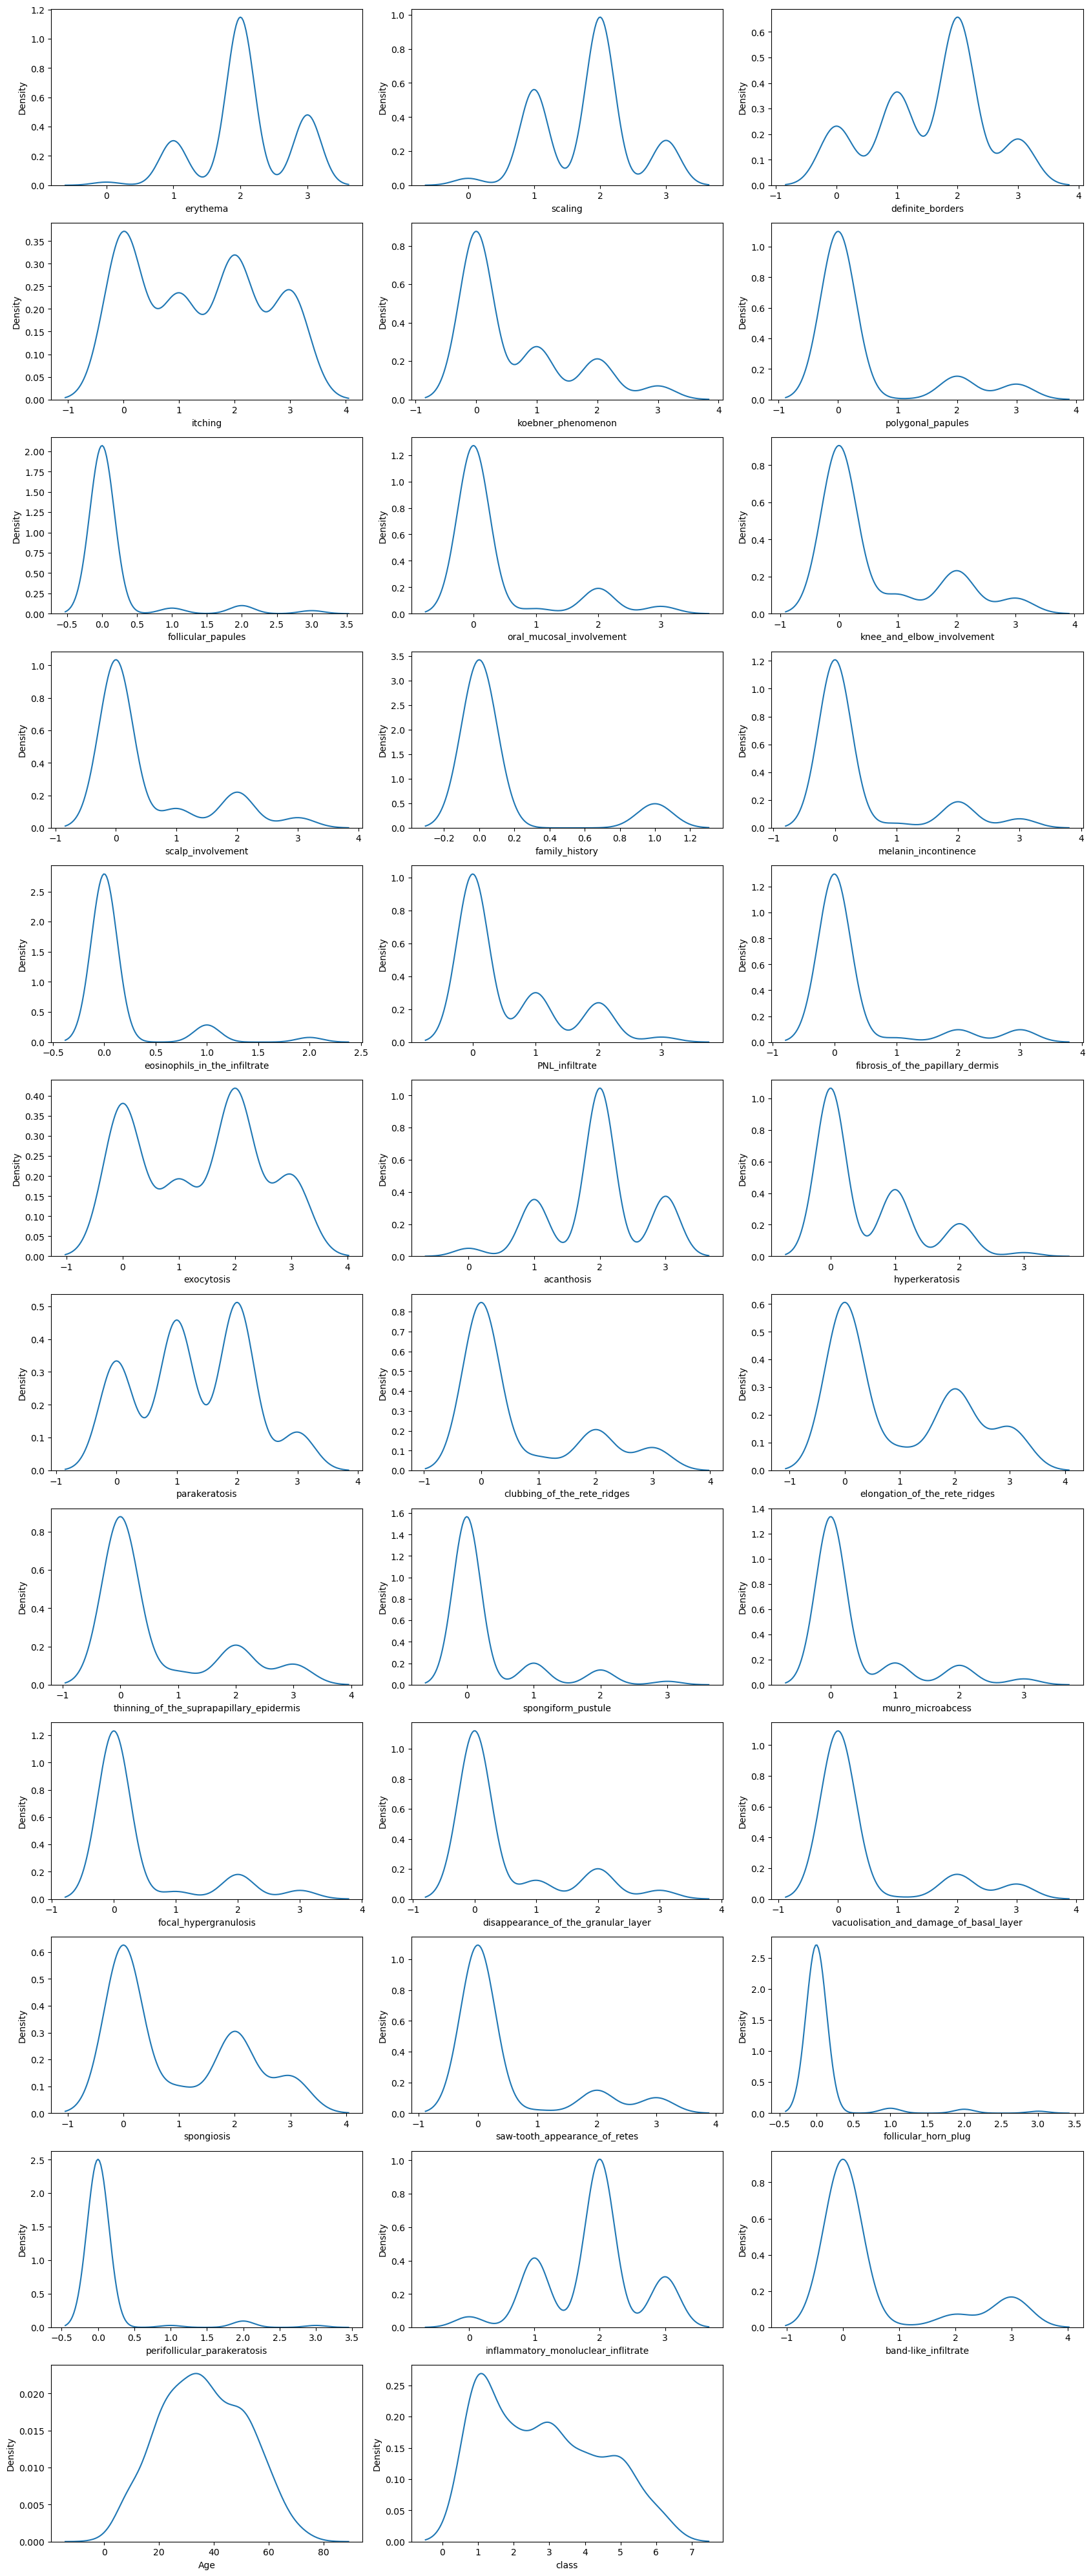

In [32]:
# Density plot of features
plt.figure(figsize=(17,40))
plotnumber=1
for i in data_eda.columns:
    plt.subplot(12,3,plotnumber)
    sns.kdeplot(df[i])
    plotnumber += 1
plt.tight_layout()

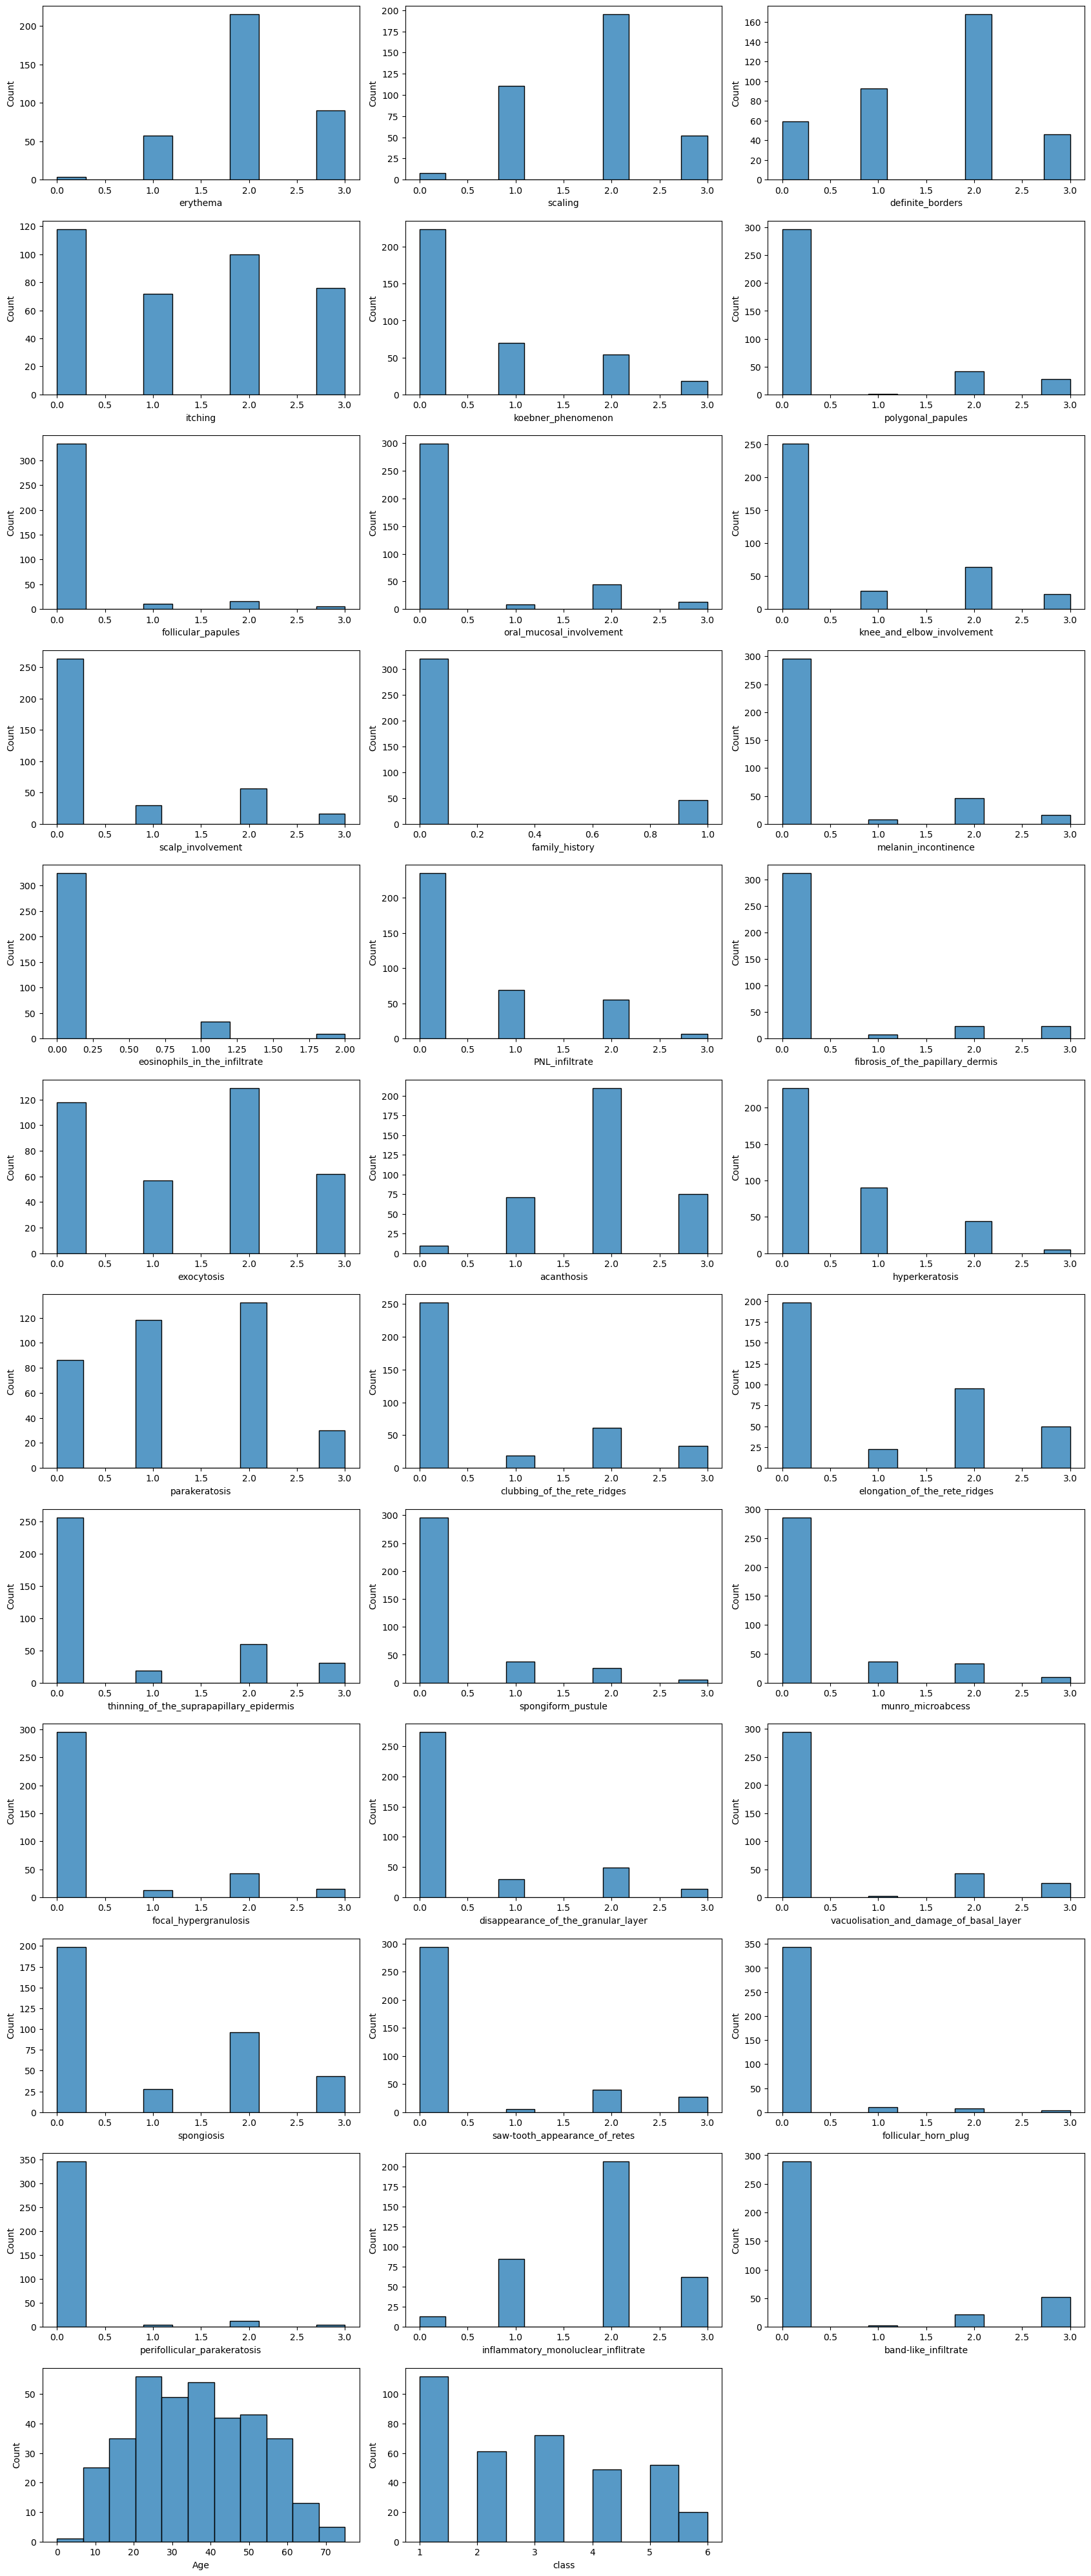

In [33]:
# Histogram of features
plt.figure(figsize=(17,40))
plotnumber=1
for i in data_eda.columns:
    plt.subplot(12,3,plotnumber)
    sns.histplot(df[i])
    plotnumber += 1
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Density'>

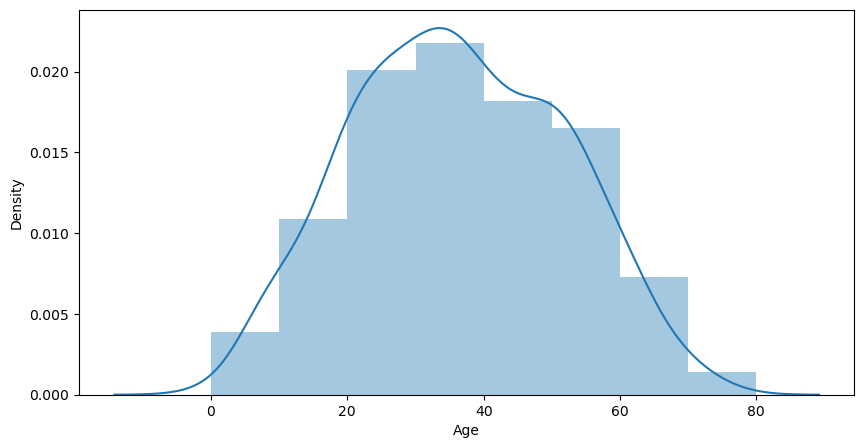

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(data_eda['Age'],bins=[0,10,20,30,40,50,60,70,80])

In [35]:
# The Age distribution seems to have moderate Normal distribution
# And half of the patients are of age 20 to 50

#### Count of Patients having and not having skin disease history

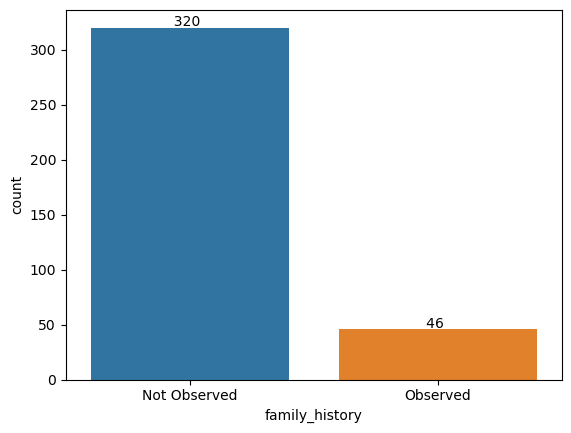

In [36]:
ax = sns.countplot(data_eda['family_history'])
for p in ax.patches:
    ax.annotate('{:5.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.0))

In [37]:
# Most of the are patient had no skin disease history

#### Count of Patients with different skin disease

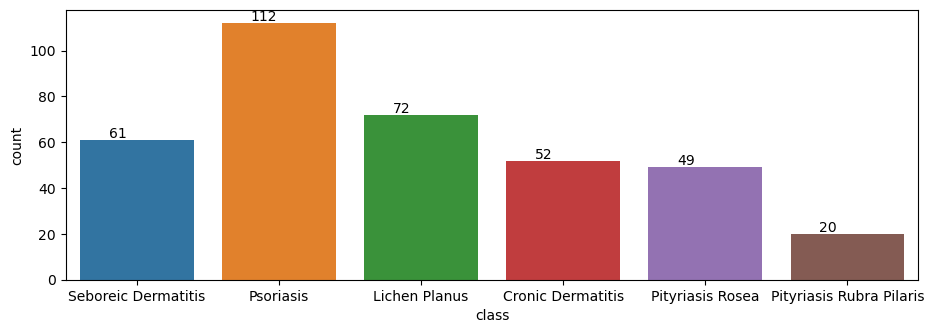

In [38]:
plt.figure(figsize=(11,3.5))
ax = sns.countplot(data_eda['class'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1.0))

#### Percentage wise distribution of different disease

In [39]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [40]:
# DataFrame for clinical features
data_clinical = df[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement']]

In [41]:
# DataFrame for Histopathologicalfeatures
data_Histopathology = df[['melanin_incontinence', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]

#### Percentage wise distribution of each category of all clinical columns

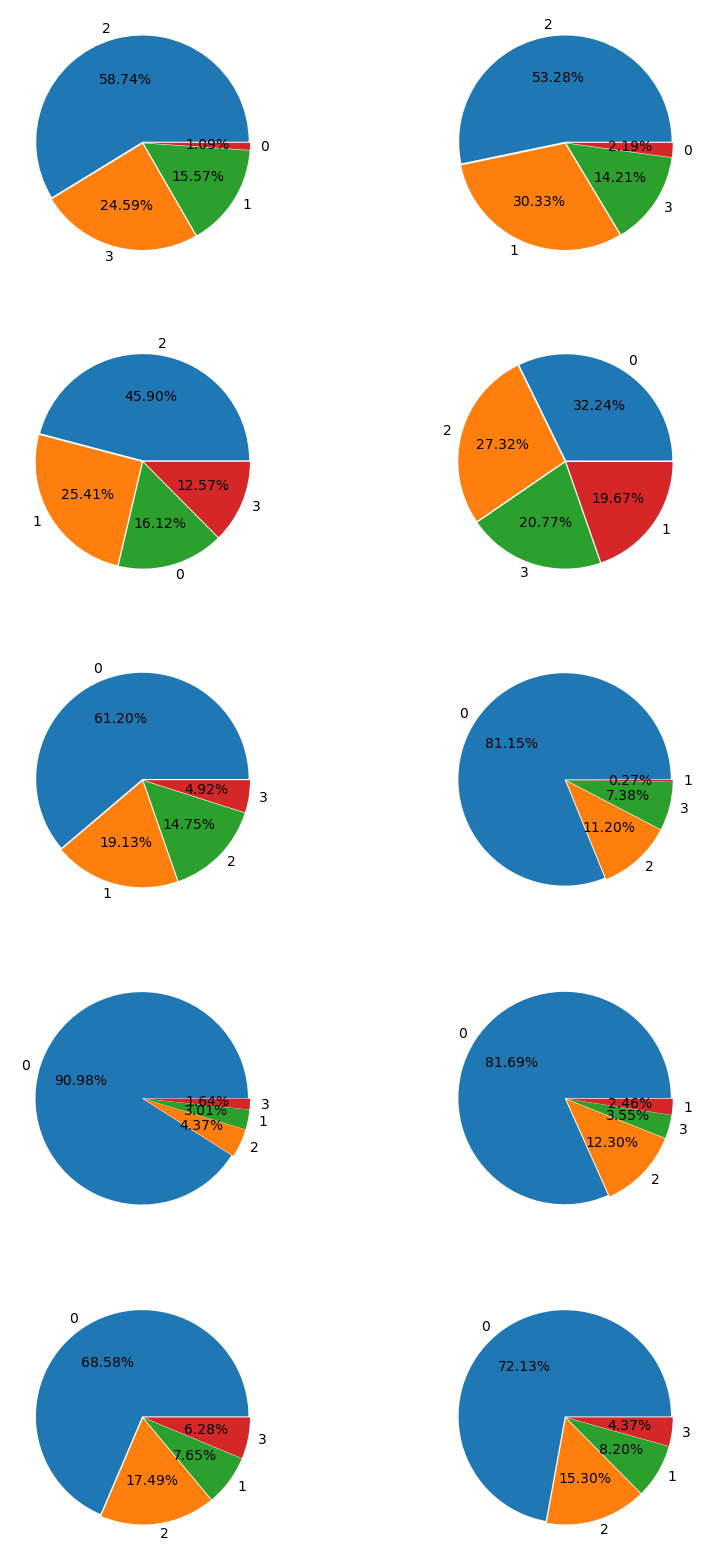

<Figure size 640x480 with 0 Axes>

In [42]:
# Density plot of features
plt.figure(figsize=(10,20))
plotnumber=1
for i in data_clinical.columns:
    plt.subplot(5,2,plotnumber)
    plt.pie(data_eda[i].value_counts(), labels=data_eda[i].value_counts().index,autopct='%1.2f%%', explode = (0.01, 0.01, 0.01, 0.01))
    plotnumber += 1
plt.show()
plt.tight_layout()

#data_eda['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', radius=1.0, pctdistance=0.8,explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01))

#### Percentage wise distribution of each category of all Histopathological columns

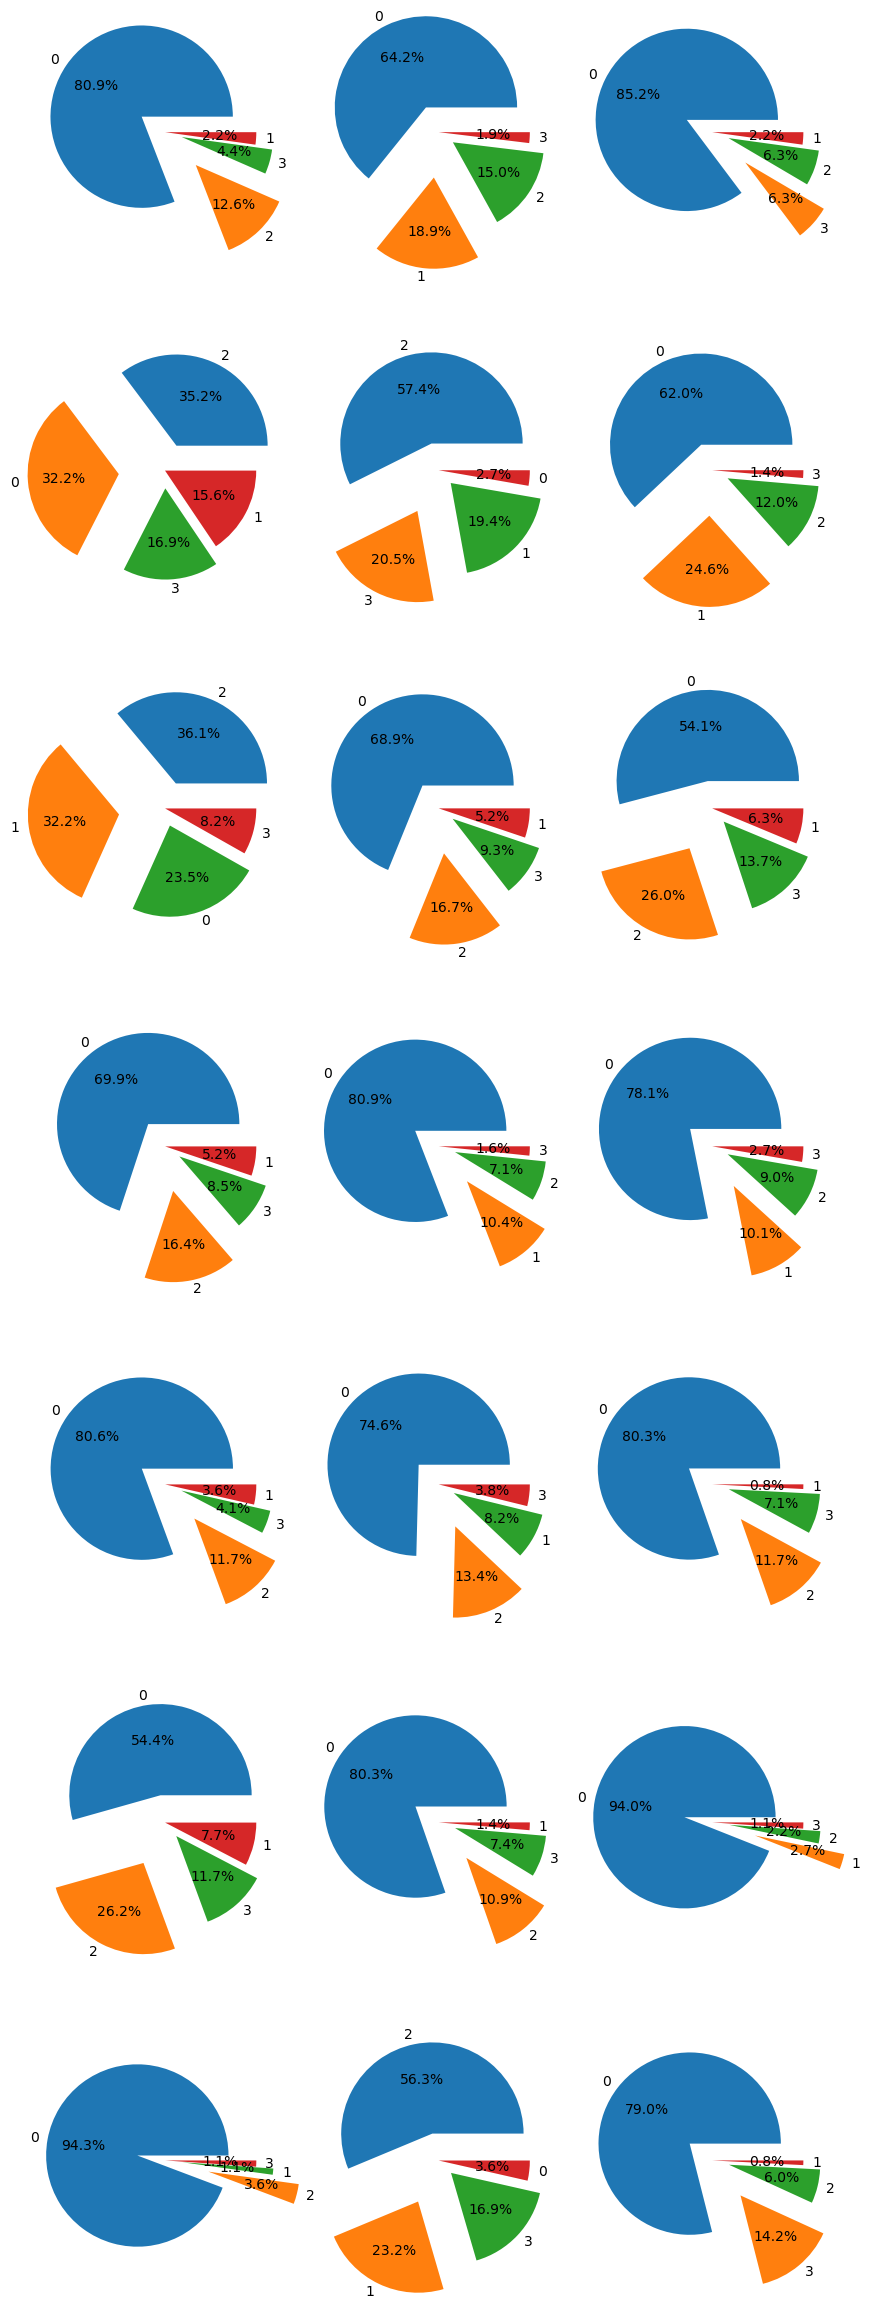

<Figure size 640x480 with 0 Axes>

In [43]:
# Density plot of features
plt.figure(figsize=(10,30))
plotnumber=1
for i in data_Histopathology.columns:
    plt.subplot(7,3,plotnumber)
    plt.pie(data_Histopathology[i].value_counts(), labels=data_Histopathology[i].value_counts().index,autopct='%1.1f%%', explode = (0.3, 0.5, 0.2, 0.01))
    plotnumber += 1
plt.show()
plt.tight_layout()


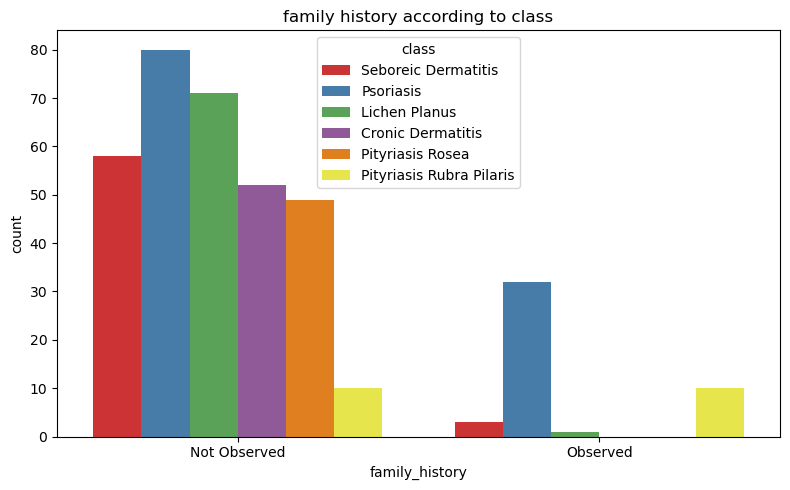

In [44]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'family_history', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')

plt.tight_layout()

In [45]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

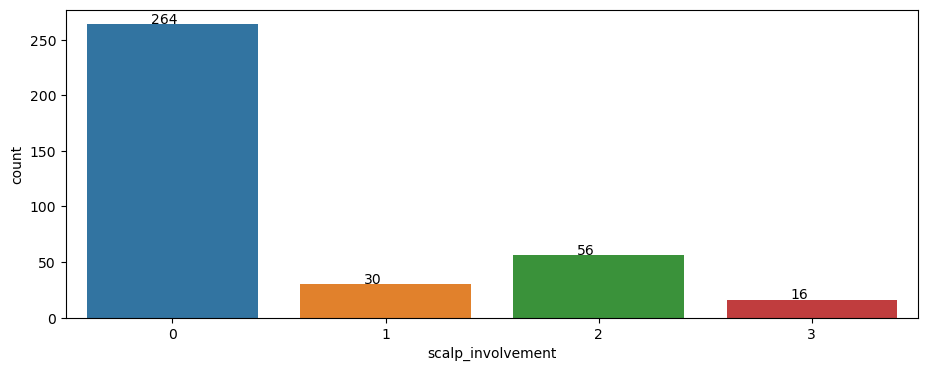

In [46]:
plt.figure(figsize=(11,4))
ax = sns.countplot(data_eda['scalp_involvement'])
for p in ax.patches:
    ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1.0))

Most of Patients have not scalp_involvement symptoms

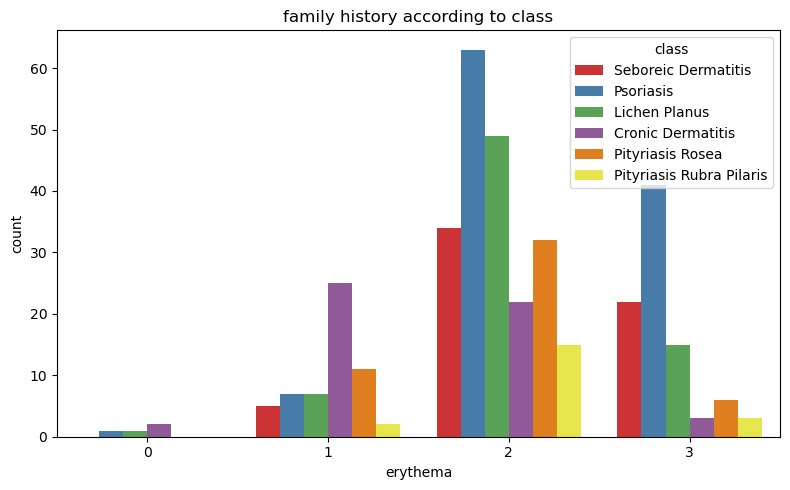

In [47]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'erythema', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

In [48]:
# No erthema symptoms found in skin disease like Seboreic Dermatitis,Pityriasis Rosea, and Pityriasis Rubra Pilaris.
# Patients having erthema symptoms in advance and severe amount are prone to have Psoriasis disease

<Figure size 1600x500 with 0 Axes>

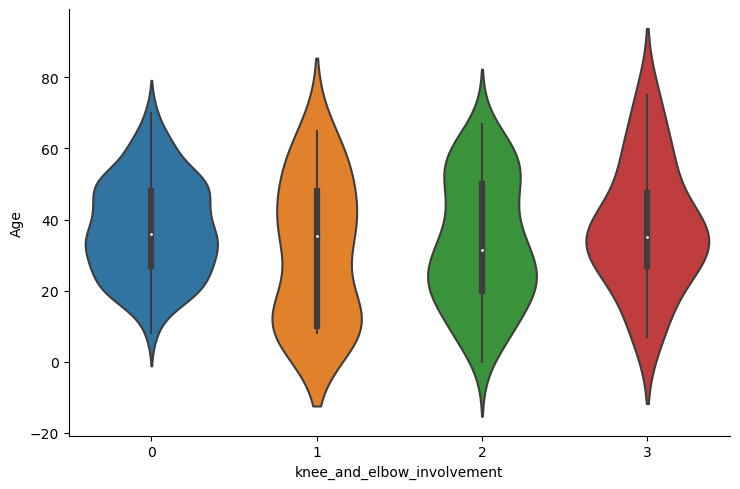

In [49]:
plt.figure(figsize=(16,5))
sns.factorplot(x="knee_and_elbow_involvement",y="Age",data=data_eda,kind='violin',size=5,aspect=1.5)
plt.show()

In [50]:
# Patients of age between 7-75 are having large amount of skin complexities on knee and elbow

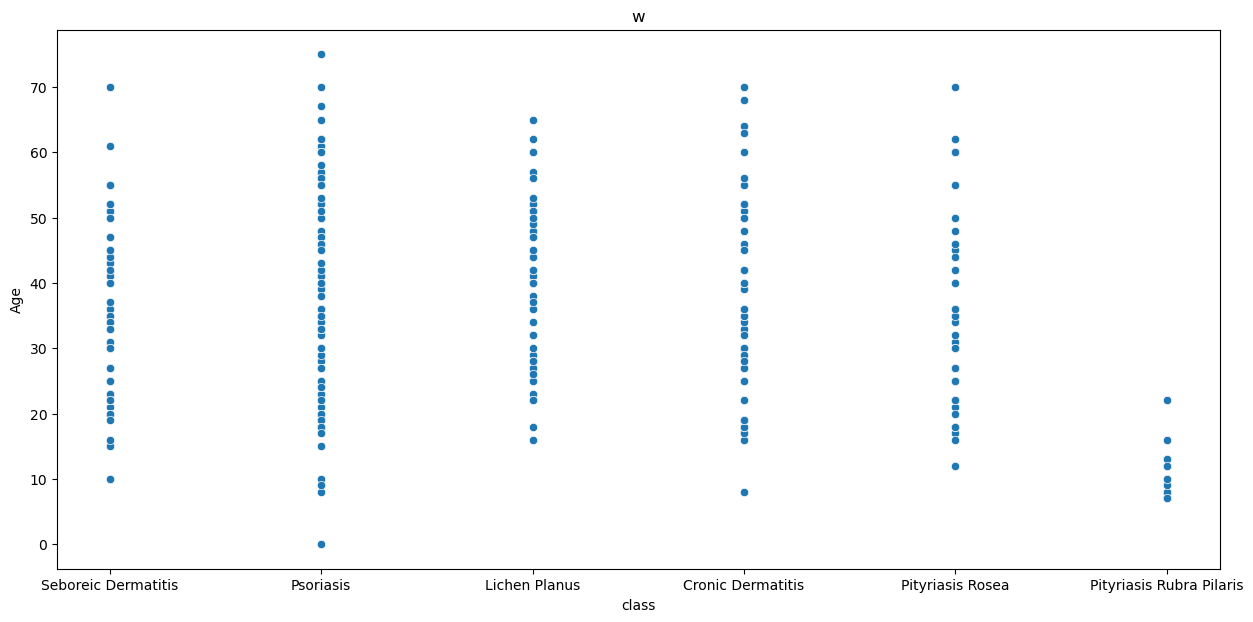

In [51]:
plt.figure(figsize=(15,7))
sns.scatterplot('class','Age',data=data_eda).set(title='w')
plt.show()


In [52]:
# Patients with Pityriasis Rubra Pilaris dieases are of age 8-20.
# And any age group patients are prone to have Psoriasis dieases .

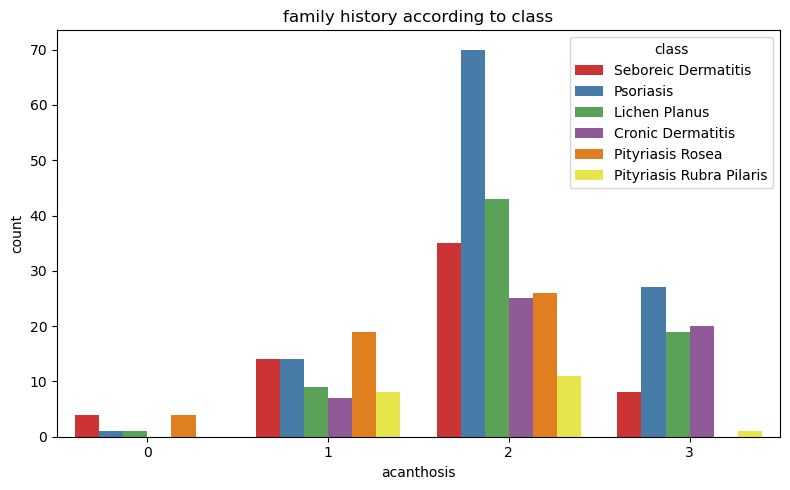

In [53]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'acanthosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

Patients having no Acanthosis(A skin condition that causes a dark discoloration in body folds and creases)symptoms are less prone of getting cronic Dermatitis and Pityriasis Rubra Pilaris disease.And Patients with large amount of Acanthosis symptoms are prone to have all skin disease except than Pityriaisis Rosea disease.

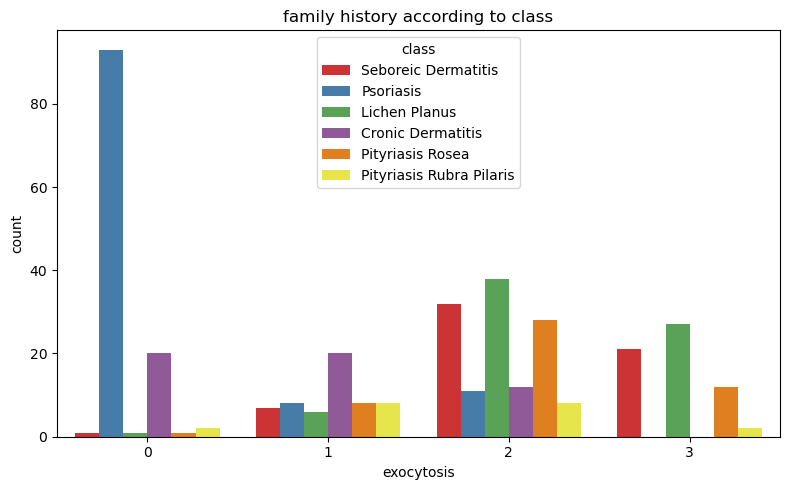

In [54]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'exocytosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')

plt.tight_layout()

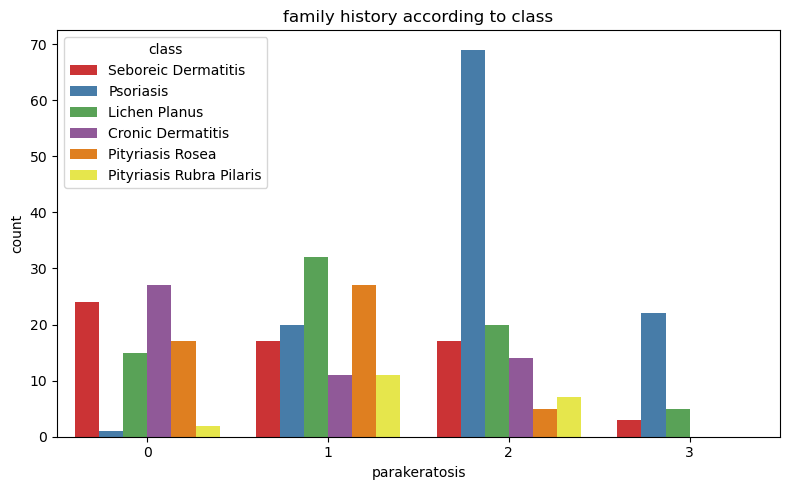

In [55]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'parakeratosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

Parakeratosis(Incomplete maturation of epidermal keratinocytes) occurs many in skin dieases but particularly in Psoriasis followed by Lichen Planus and Seboreic Dermatisis.

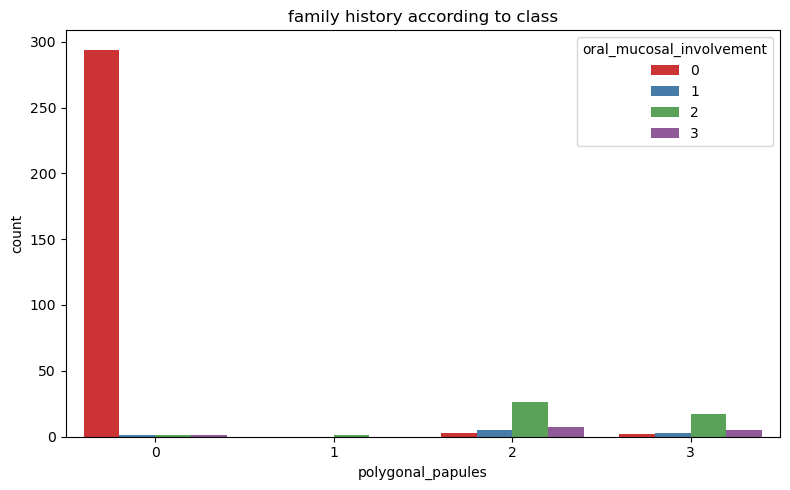

In [56]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'polygonal_papules', hue = 'oral_mucosal_involvement', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

Most of the Patients are not having any symptoms like poplygonal_papules and oral_mucosal_involvement simultaneously. Less count of patients for both the symptoms in sever form.

In [57]:
# plt.subplots(figsize = (9, 3))
# sns.swarmplot(hue='oral_mucosal_involvement',y = 'polygonal_papules',x ='class', data = data_eda, palette = 'Set1')
# plt.title('family history according to class')
# plt.tight_layout()

In [58]:
# DataFrame for clinical features
data_clinical1 = df[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement','Age','class','family_history']]

<AxesSubplot:>

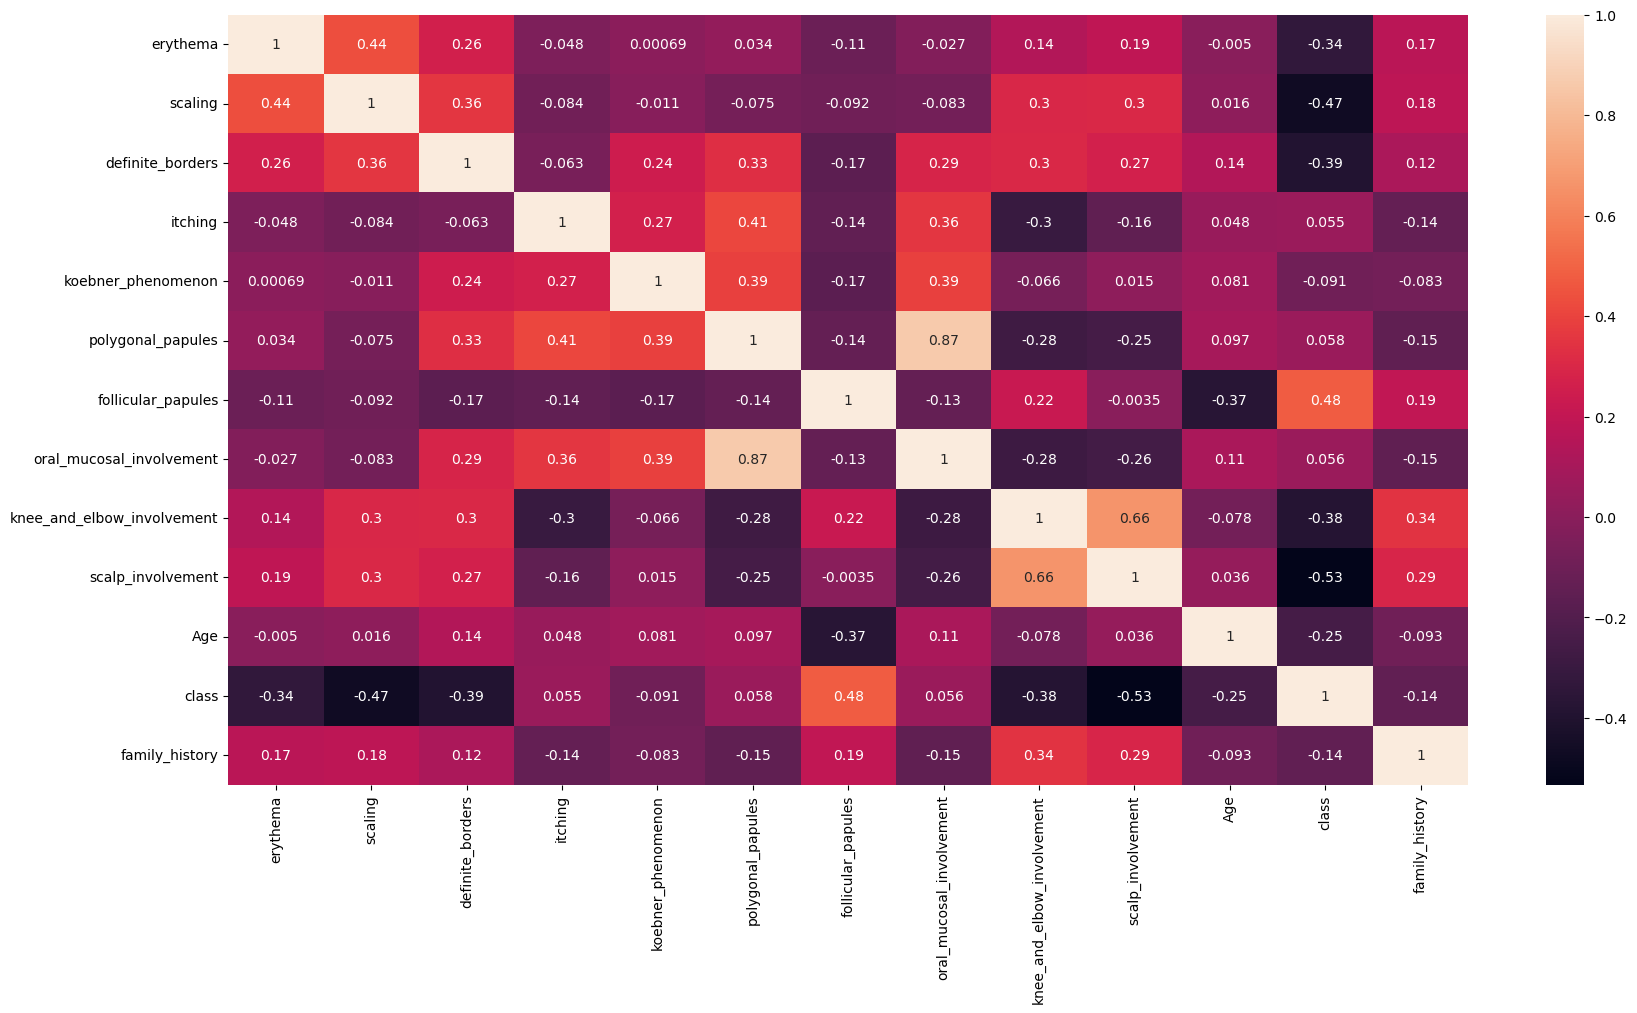

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(data_clinical1.corr(),annot=True)

In [60]:
# DataFrame for Histopathologicalfeatures
data_Histopathology = df[['melanin_incontinence', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate','class']]

<AxesSubplot:>

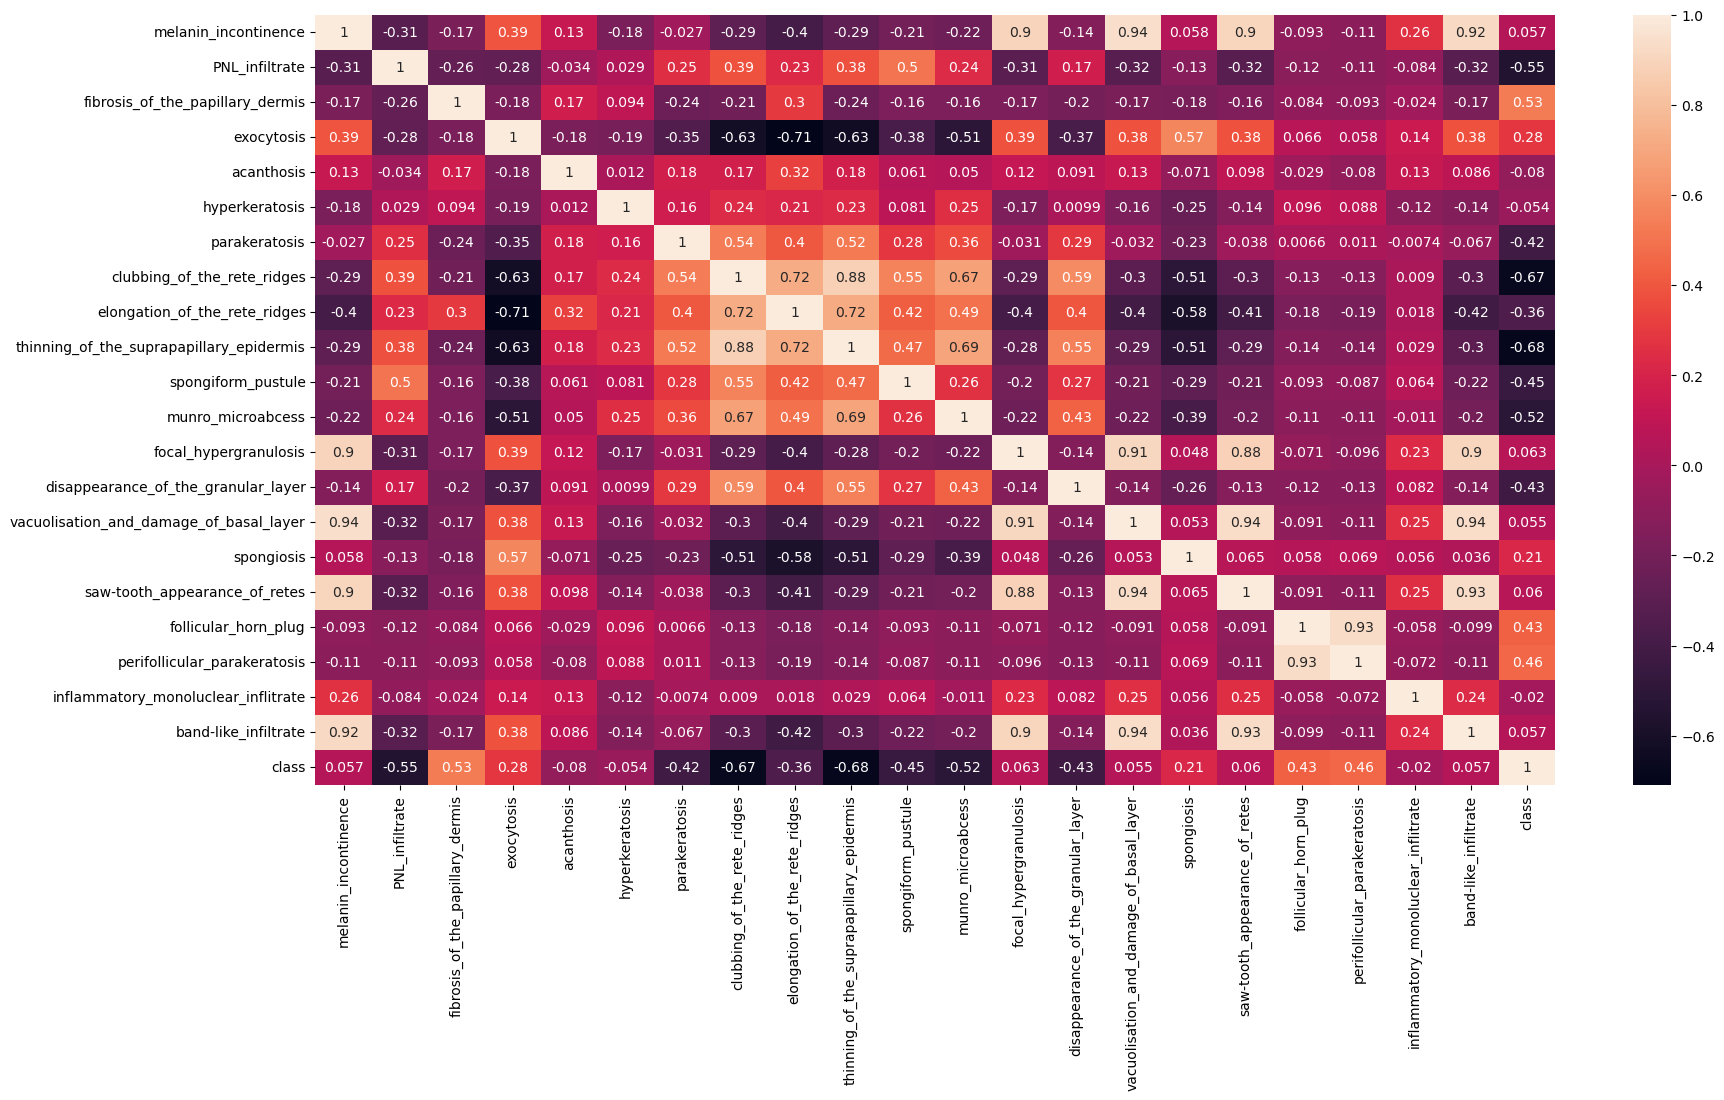

In [61]:
plt.figure(figsize=(20,10))
sns.heatmap(data_Histopathology.corr(),annot=True)

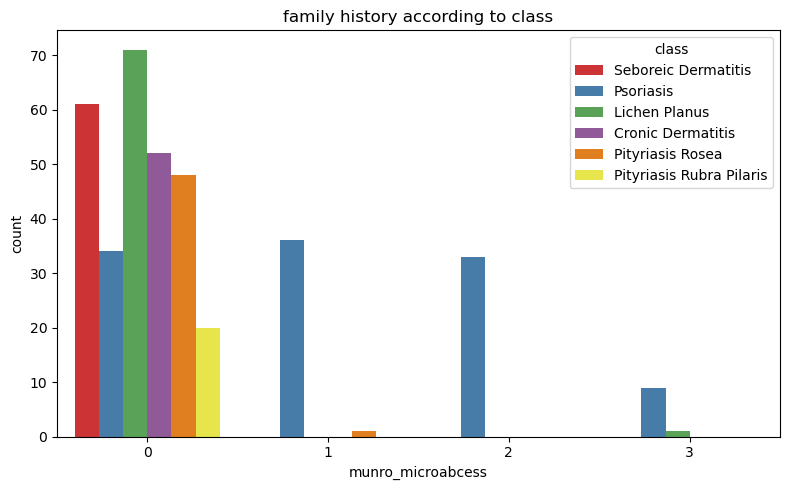

In [62]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'munro_microabcess', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

Munro's microabscess is an abscess (collection of neutrophils) in the stratum corneum of the epidermis due to the infiltration of neutrophils from papillary dermis into the epidermal stratum corneum. It is not a symptom of Seaboreic Dermatitis,Cronic Dermatisis and Pityriasis Rubra Pilaris but could be a symtom of Psoriasis and Pityriasis Rosea if patient are having munro_microbacess symptom in intermediate amount.They are a cardinal sign of Psoriasis.

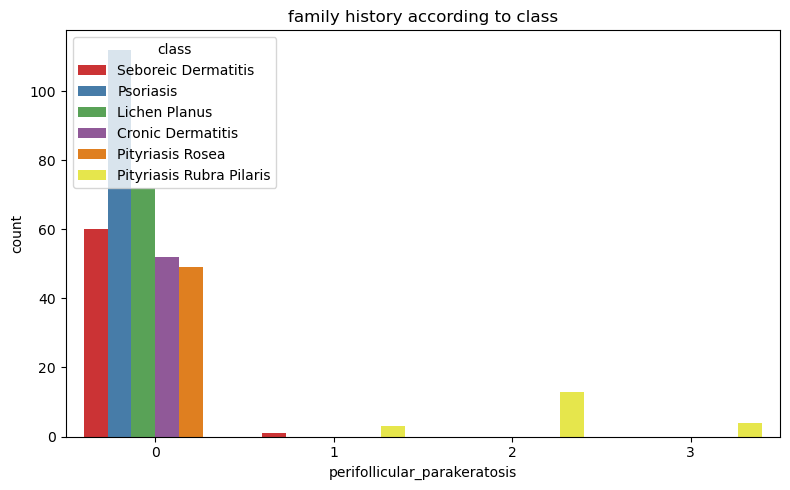

In [63]:
plt.subplots(figsize = (8, 5))
sns.countplot(x = 'perifollicular_parakeratosis', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

Perifollicular_parakertosis  is particularly occurs in Pityriasis Rubra Pilaris skin disease.

<AxesSubplot:>

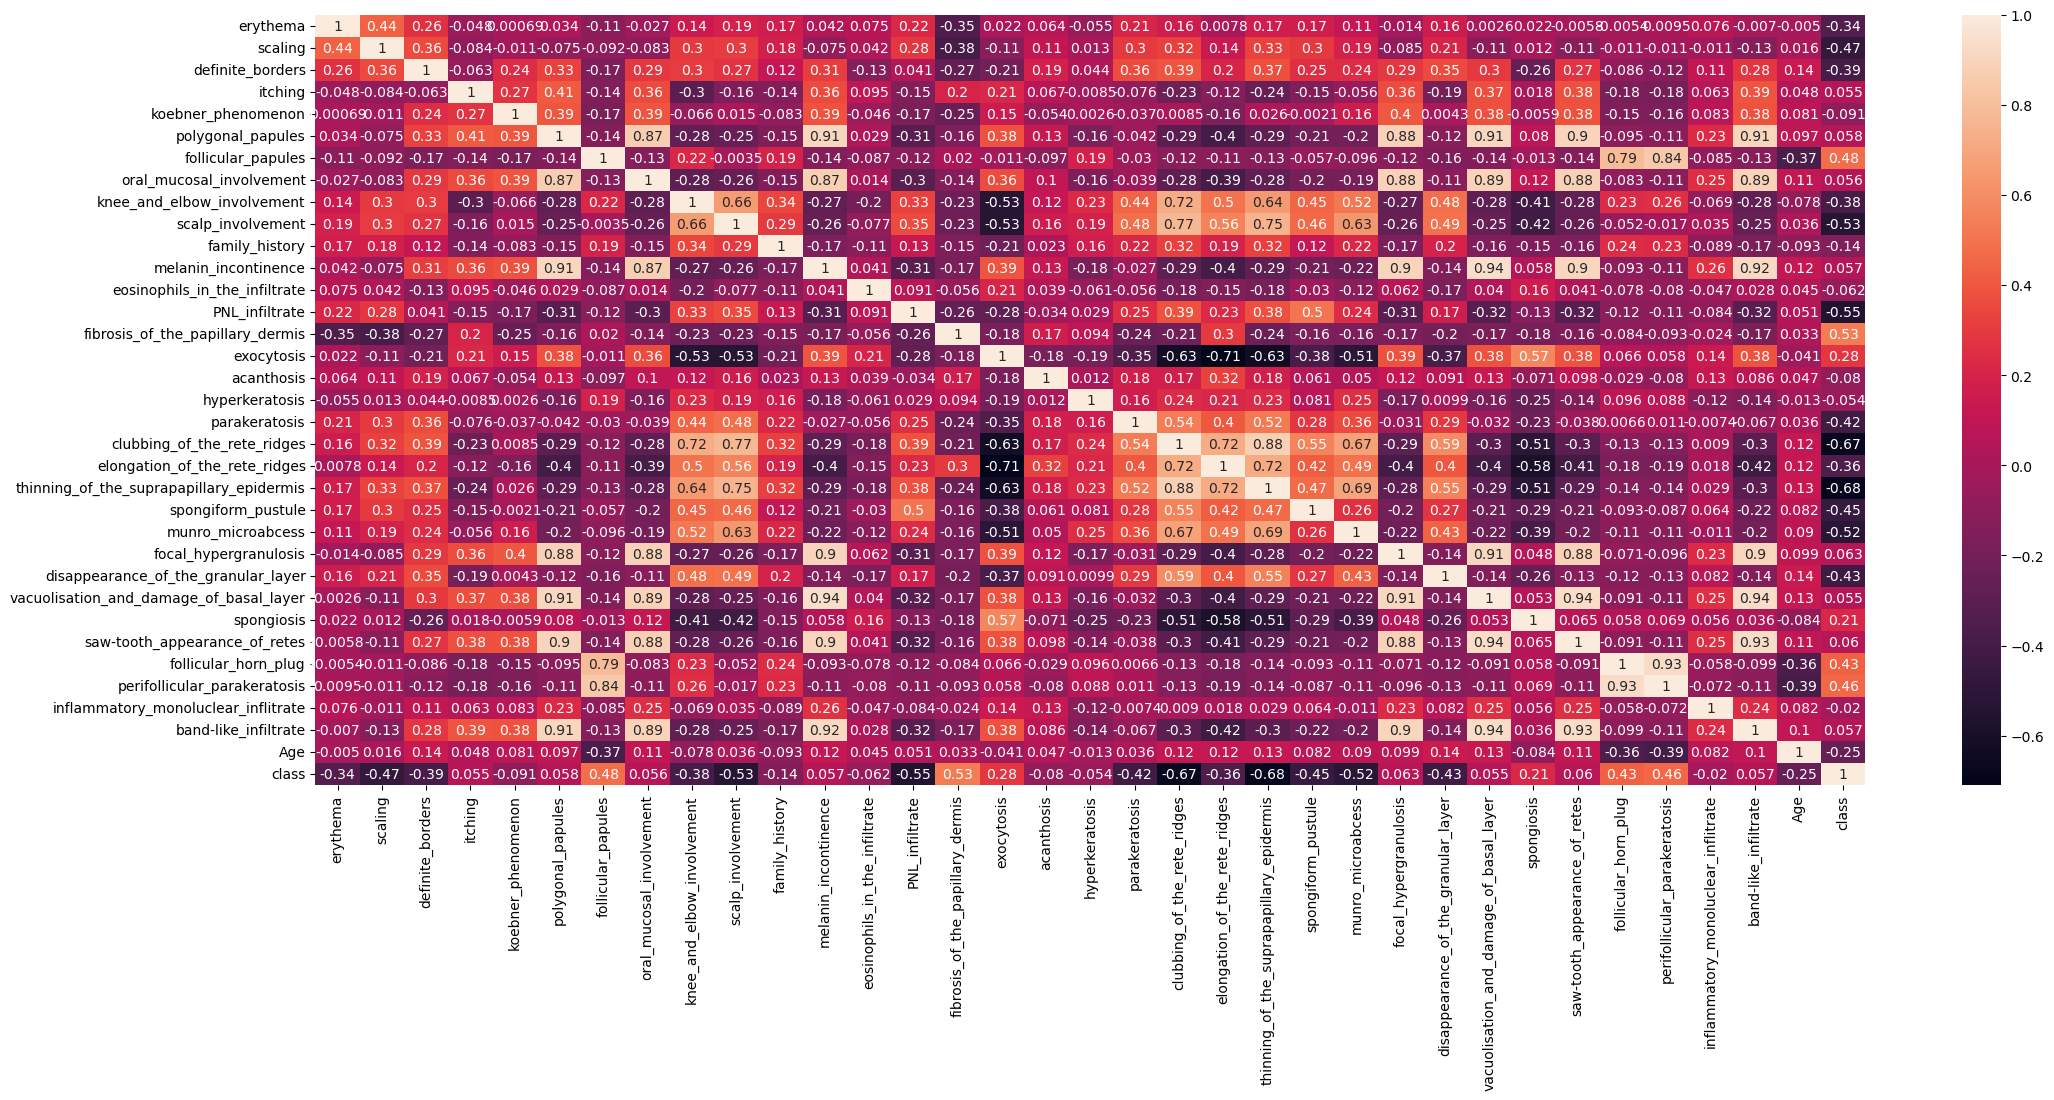

In [64]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [65]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

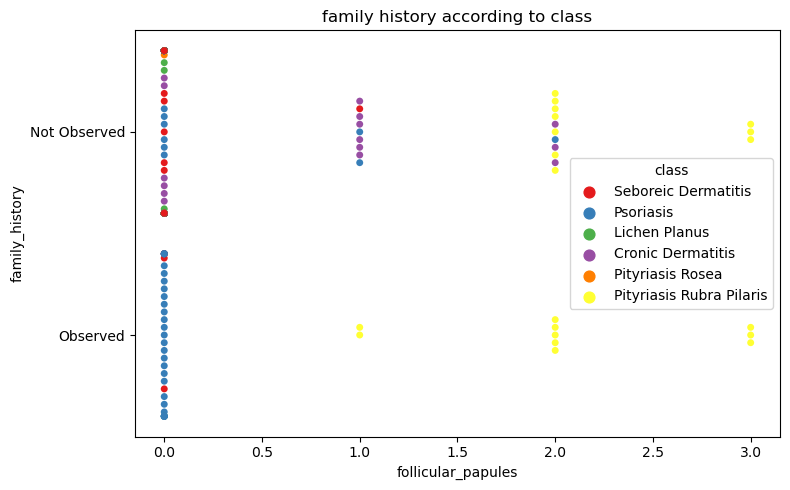

In [66]:
plt.subplots(figsize = (8, 5))
sns.swarmplot(x = 'follicular_papules',y='family_history', hue = 'class', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

In [67]:
data_eda['class'].unique()

array(['Seboreic Dermatitis', 'Psoriasis', 'Lichen Planus',
       'Cronic Dermatitis', 'Pityriasis Rosea',
       'Pityriasis Rubra Pilaris'], dtype=object)

In [68]:
df.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [69]:
df1 = data_eda.copy()

In [70]:
df1.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

  disappearance_of_the_granular_layer  \
0                                   0   
1                                   0   
2                                   0   
3                                   3   
4                                   2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate   Age                class  
0                     0  55.0  Seboreic Dermatitis  
1                     0   8.0            Psoriasis  
2                     3  26.0        Lichen Planus  
3                     0  40.0            Psoriasis  
4                     3  45.0        Lichen Planus  

[5 rows x 35 columns]

Text(0.5, 0.98, 'Age vs. different diseases')

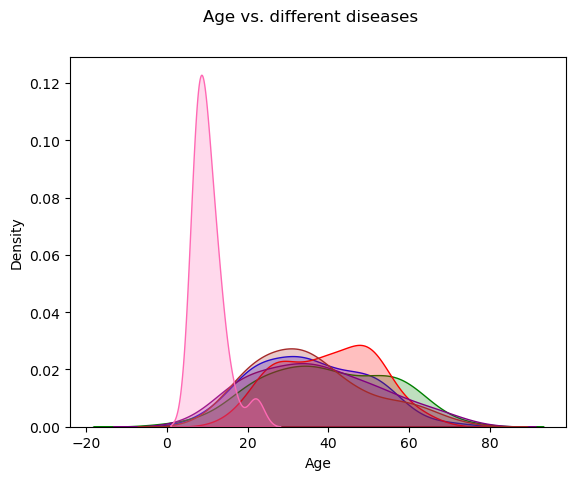

In [71]:
fig, ax = plt.subplots()

sns.kdeplot(df1[df1["class"]=='Seboreic Dermatitis']["Age"], shade=True, color="blue", label="Seboreic Dermatitis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Psoriasis']["Age"], shade=True, color="green", label="Psoriasis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Lichen Planus']["Age"], shade=True, color="red", label="Lichen Planus", ax=ax)
sns.kdeplot(df1[df1["class"]=='Cronic Dermatitis']["Age"], shade=True, color="purple", label="Cronic Dermatitis", ax=ax)
sns.kdeplot(df1[df1["class"]=='Pityriasis Rosea']["Age"], shade=True, color="brown", label="Pityriasis Rosea", ax=ax)
sns.kdeplot(df1[df1["class"]=='Pityriasis Rubra Pilaris']["Age"], shade=True, color="hotpink", label="Pityriasis Rubra Pilaris", ax=ax)
ax.set_xlabel("Age")
ax.set_ylabel("Density")
fig.suptitle("Age vs. different diseases")

Except Pityriasis Rubra Pilaris skin disease(in range of age between 0-28), all disease are spread over all age groups.

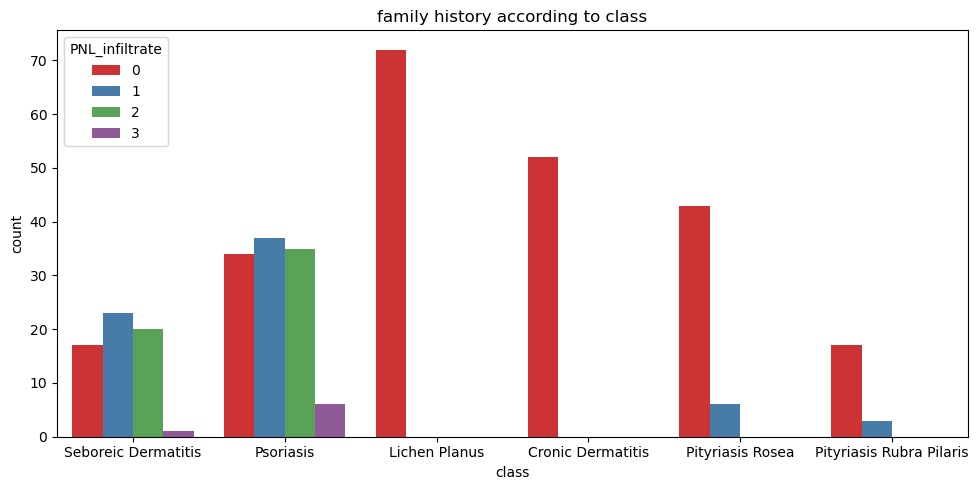

In [72]:
plt.subplots(figsize = (10, 5))
sns.countplot(x = 'class', hue = 'PNL_infiltrate', data = data_eda, palette = 'Set1')
plt.title('family history according to class')
plt.tight_layout()

### Data Preprocessing 

#### 1) Data Cleaning

In [73]:
# dataset for Modeling
df1 = df.copy()

In [74]:
df1['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., nan, 15.,
       46., 62., 35., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13.,
       27., 31., 28., 64., 39., 47., 16.,  0.,  7., 70., 37., 61., 67.,
       56., 53., 24., 58., 49., 63., 68.,  9., 75.])

Since by viewing the dataset we found that column Age is having rows value of '0' and '?'. So we can replace these rows with some central tendency Measurement values.

In [75]:
# Replacing ? with median value 
df1['Age'].fillna(df1['Age'].median(),inplace=True)

In [76]:
# Replacing 0 with median value 
df1.loc[df['Age']==0.0,'Age'] = df1['Age'].median()

In [77]:
df1['Age'].unique()

array([55.,  8., 26., 40., 45., 41., 18., 57., 22., 30., 20., 21., 10.,
       65., 38., 23., 17., 51., 42., 44., 33., 43., 50., 34., 35., 15.,
       46., 62., 48., 12., 52., 60., 32., 19., 29., 25., 36., 13., 27.,
       31., 28., 64., 39., 47., 16.,  7., 70., 37., 61., 67., 56., 53.,
       24., 58., 49., 63., 68.,  9., 75.])

In [78]:
df1.loc[df1['Age']==0.0]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

#### 2) Duplicasy check

In [79]:
df1.duplicated().sum()

0

In [80]:
x = df1.drop('class',axis=1)
y = df1['class']

### Scaling Data

In [81]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
rs_data = rc.fit_transform(x)

In [82]:
# since scaled_data in an array form so we have to convert it to dataframe for further process
dfof_rs_data = pd.DataFrame(data=rs_data,columns=x.columns)

In [83]:
dfof_rs_data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0       0.0      0.0              -2.0      1.0                 0.0   
1       1.0      1.0               1.0      0.5                 1.0   
2       0.0     -1.0               0.0      1.0                 1.0   
3       0.0      0.0               0.0     -0.5                 0.0   
4       0.0      1.0               0.0      0.5                 2.0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                0.0                 0.0                       0.0   
1                0.0                 0.0                       0.0   
2                3.0                 0.0                       3.0   
3                0.0                 0.0                       0.0   
4                2.0                 0.0                       2.0   

   knee_and_elbow_involvement  scalp_involvement  ...  focal_hypergranulosis  \
0                         1.0                0.0  ...                    0.0   
1                         1.0                1.0  ...                    0.0   
2                         0.0                0.0  ...                    2.0   
3                         3.0                2.0  ...                    0.0   
4                         0.0                0.0  ...                    2.0   

   disappearance_of_the_granular_layer  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  3.0   
4                                  2.0   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                      0.0         1.5   
1                                      0.0         0.0   
2                                      2.0         1.5   
3                                      0.0         0.0   
4                                      3.0         1.0   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                            0.0                   0.0   
1                            0.0                   0.0   
2                            2.0                   0.0   
3                            0.0                   0.0   
4                            3.0                   0.0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                           0.0                                 -1.0   
1                           0.0                                 -1.0   
2                           0.0                                  0.0   
3                           0.0                                  1.0   
4                           0.0                                  0.0   

   band-like_infiltrate       Age  
0                   0.0  0.869565  
1                   0.0 -1.173913  
2                   3.0 -0.391304  
3                   0.0  0.217391  
4                   3.0  0.434783  

[5 rows x 34 columns]

### Label Encoding

In [84]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [98]:
y = pd.DataFrame(data=y_encoded)

### Feature engineering using PCA

In [85]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA()
new_data = pca.fit_transform(dfof_rs_data)

In [86]:
new_data.shape

(366, 34)

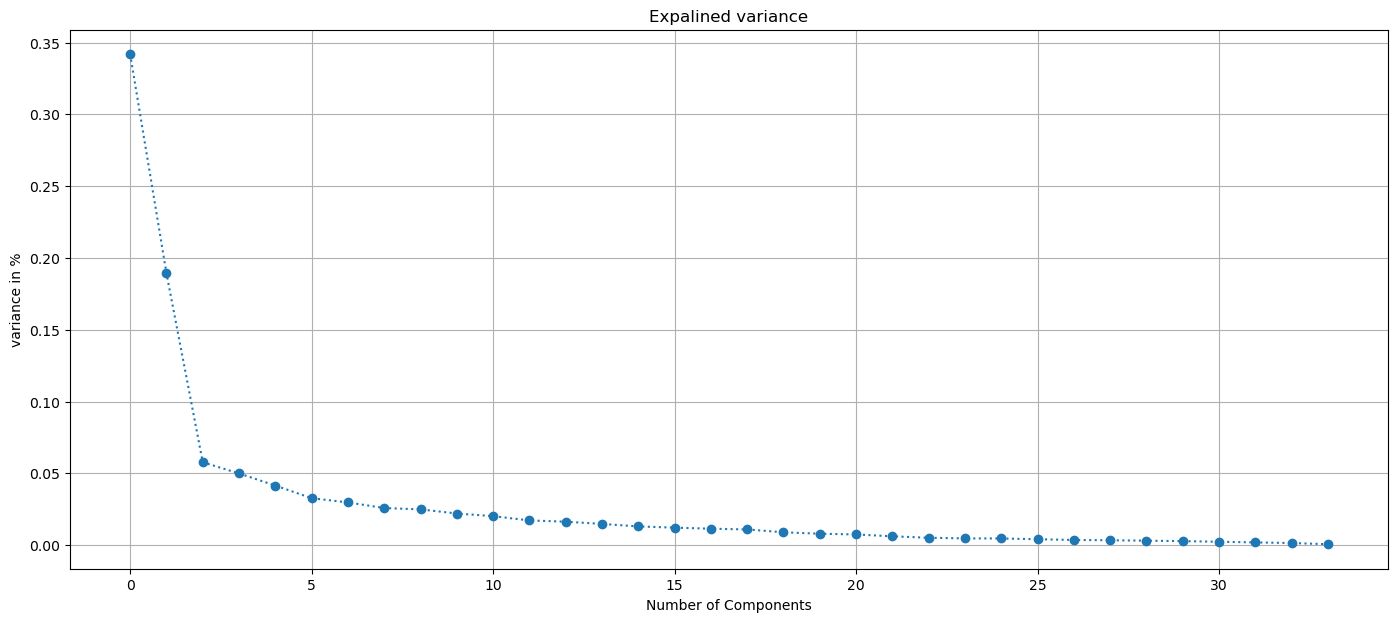

In [87]:
# Scree plot to get the optimum value of principal components
plt.figure(figsize=(17,7))
plt.plot((pca.explained_variance_ratio_),marker='o',linestyle='dotted')
plt.xlabel('Number of Components')
plt.ylabel('variance in %') # for each component
plt.title('Expalined variance')
plt.grid()
plt.show()

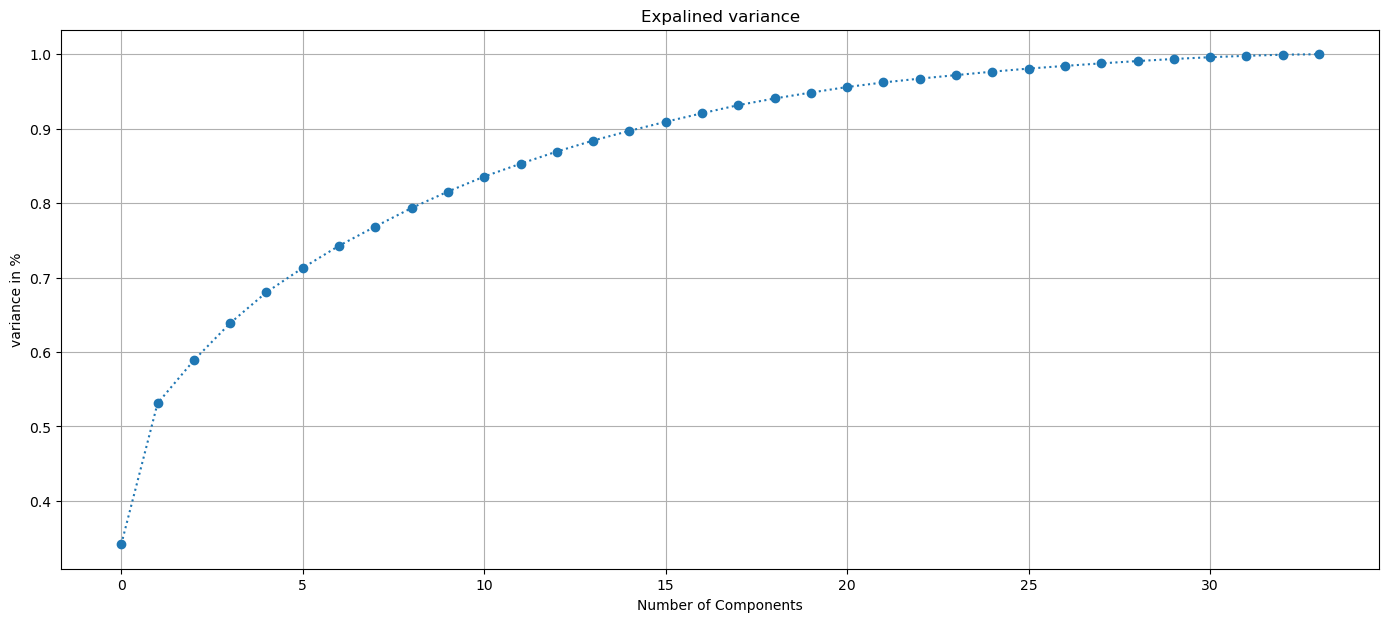

In [88]:
# Scree plot to get the optimum value of principal components
plt.figure(figsize=(17,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='dotted')
plt.xlabel('Number of Components')
plt.ylabel('variance in %') # for each component
plt.title('Expalined variance')
plt.grid()
plt.show()

In [89]:
from sklearn.decomposition import PCA
pca29=PCA(n_components = 29,random_state=42)
new_data=pca29.fit_transform(dfof_rs_data)

In [90]:
x = pd.DataFrame(data=new_data)

In [91]:
x.head()

0         1         2         3         4         5         6   \
0 -0.330130 -2.271360 -0.580511 -0.487130  0.209889  0.202129  0.421138   
1 -1.993447  1.851602 -0.915042 -0.333758 -0.151341 -0.754827 -1.067509   
2  5.034977  1.157924 -0.004752  0.425656 -0.349655 -0.358989  0.188963   
3 -3.214720  3.268135 -0.611112 -0.333671 -1.493471  0.670689  1.977103   
4  5.006574  1.646549 -0.192812 -0.612303  0.502678  1.357274  0.124867   

         7         8         9   ...        19        20        21        22  \
0  0.176008 -0.218160 -0.367580  ... -1.027574 -0.445172  0.247070 -0.167061   
1 -0.303570  1.119265 -1.123465  ... -0.500658 -0.145336  0.302301 -0.041129   
2  0.100764 -0.757254 -0.557355  ... -0.124134 -0.864230  0.609667 -0.719100   
3  0.356613  0.279160 -0.074961  ...  0.301701  0.028150 -0.110410  0.148474   
4  0.491103  0.534958 -0.068352  ...  0.781449 -0.132589 -0.468571 -0.188915   

         23        24        25        26        27        28  
0  0.081442  0.094709 -0.174812 -0.147006 -0.110694 -0.038654  
1 -0.089242  0.609392  0.568082 -0.026122  0.099874  0.081652  
2 -0.259608 -1.107473  0.021749  0.866456 -0.080798  0.040649  
3  0.002058 -0.138964 -0.196433  0.121500  0.018981  0.056928  
4 -1.148356  0.108990 -0.227653  0.215817 -0.488723  0.442532  

[5 rows x 29 columns]

### Train and Test split 

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [100]:
X_train.head(2)

0         1         2         3         4         5         6   \
268 -0.568045 -2.120394 -1.444845  2.182171  0.348717  0.324680 -0.180362   
231 -1.093959 -0.591218 -1.089511 -0.851011 -1.548544 -1.837344  0.641055   

           7         8         9   ...        19        20        21  \
268 -0.354567 -0.124782  0.601920  ...  0.145666 -0.056555 -0.177698   
231 -1.452981 -1.440318 -0.780867  ...  0.445150  1.006413 -0.066800   

           22        23        24        25        26        27        28  
268  0.036142 -0.148174 -0.394038 -0.419464 -0.234197 -0.005230  0.167374  
231  0.022000 -0.213068 -0.230522  0.059761  0.175980  0.169602 -0.100859  

[2 rows x 29 columns]

### Data Imbalancy check

In [101]:
y_train.value_counts()

0    72
2    53
1    45
4    36
3    34
5    16
dtype: int64

Since Data is imbalance so to balance the data set we use one of the technique called SMOTE 

In [106]:
# Data balancing using SMOTE 
## Data balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(X_train,y_train)

In [107]:
x_smote

0         1         2         3         4         5         6   \
0   -0.568045 -2.120394 -1.444845  2.182171  0.348717  0.324680 -0.180362   
1   -1.093959 -0.591218 -1.089511 -0.851011 -1.548544 -1.837344  0.641055   
2    5.134850  1.516513 -0.976072  0.250081 -1.625309 -0.358209 -0.291183   
3   -0.827786 -2.188364  3.045213  1.075090 -0.765405 -1.198572 -0.310879   
4   -0.582160 -2.442337  2.121551  0.248490 -0.595447 -0.482002  0.293045   
5   -0.565769 -2.162993  0.840779  0.235101  0.015741 -0.519141 -0.621308   
6   -1.035054 -0.908572 -1.097141 -1.146435 -0.955938 -1.397108  1.197105   
7    5.441739  2.342669 -0.050332  0.879316  1.247577  0.161299 -0.018654   
8   -0.239558 -1.595842 -0.473569 -0.984002  1.068028  1.234396 -0.581250   
9   -0.309083 -1.442488 -0.013339 -0.377604 -0.830308  0.328905 -0.711715   
10  -2.451759  2.075801 -0.013287  0.100468 -0.767066  0.319118 -0.449541   
11  -0.067046 -1.912648 -1.274313 -0.691957  1.613277 -0.319739 -0.142758   
12  -0.898839 -1.798114 -1.422427 -0.473299 -0.075706 -1.645833  0.876133   
13   4.353024  1.057812  0.062693  0.616517  1.291908 -1.466202 -0.546333   
14  -0.258343 -1.604150 -0.825986 -0.334867 -0.340073  0.973472 -0.779325   
15  -1.356518 -0.036739 -0.394393 -1.304848 -0.992116 -0.277302  0.015370   
16  -2.346813  2.136902  0.201064 -0.421094 -0.337368 -0.514357 -0.911860   
17   4.216031  1.068554 -0.105791  0.163499 -0.258600  0.088097 -0.449496   
18  -1.427708 -0.062790 -0.221064 -0.598308 -1.029851 -0.396947 -0.020577   
19  -2.320499  1.582445 -1.363157 -0.828123 -0.919169  1.050454  0.906188   
20  -2.144063  1.628078 -1.344855 -0.445509 -1.800468  0.580798 -0.070151   
21  -0.292395 -2.346250 -1.679394 -1.235571 -0.129860 -0.149387  0.540244   
22   6.000249  1.468608 -0.288602  0.137238  0.224851  0.118335  0.338663   
23   4.788414  1.624657 -0.016429  0.180434 -0.906851 -0.290165 -0.744991   
24  -0.474812 -2.796285  2.391464  0.195416 -0.760597  0.396982  0.439750   
25  -2.824906  3.065959  0.806591  0.020019  0.952157  0.838750  0.067193   
26   4.161981  1.346362  0.178793  0.454026 -1.393056 -0.909909 -0.007661   
27  -2.494937  2.437131 -0.038706  1.066318  0.062192 -1.388754 -1.554045   
28  -0.242289 -1.164642 -1.061153 -0.672230  1.382526  0.879307 -1.260482   
29  -0.544973 -1.477565 -0.918568 -0.258181 -0.768303 -0.511972 -1.052619   
30  -0.901330 -0.619789 -1.795168 -0.911569 -1.507990 -1.721096 -0.456587   
31  -1.906787  0.721961 -1.156066 -0.277836 -1.914673 -0.992318  0.594426   
32  -3.249082  2.905606 -0.167867  0.276369 -0.289957 -1.574619  0.795591   
33  -1.738020  0.375998  0.213743 -1.216866 -1.096322 -0.606983  0.664471   
34  -0.494687 -1.683768  0.642911 -0.189940 -0.054494  0.078804 -0.549090   
35  -2.771369  2.490470  0.177334 -0.571569 -0.303808  0.606330  1.065569   
36   4.117451  1.331466 -0.100898 -0.094988 -0.537611 -0.258500 -0.748709   
37  -0.659845 -1.606481 -1.732427 -0.836571 -0.216371 -0.716203 -0.143588   
38  -0.495243 -2.136308  2.035871  0.815589 -0.549956 -0.199628 -0.242148   
39  -1.682989  1.294984 -0.654219  0.648221  0.414344 -0.252210 -1.992087   
40  -3.229926  4.164883  0.023979 -0.126910 -1.478821  1.681474 -0.287161   
41  -0.314304 -1.846066 -0.994866 -0.774674 -0.519506 -0.056522  0.086275   
42   2.154630 -0.058341  1.541733 -0.188384  2.790020  0.826929  0.677286   
43  -0.524179 -1.069650 -1.588140 -0.264439 -0.899296  0.677202 -0.266290   
44  -0.673559 -2.498781  2.745802 -0.168961 -0.395811  0.394619  0.086787   
45  -0.623615 -2.169867  2.527315 -0.191451 -0.564920 -0.044655 -0.412888   
46  -0.667156 -0.798436  1.477597  0.128362 -1.527288 -0.396761 -2.437218   
47   5.639350  1.733835  0.384382  0.163599  0.428838 -0.919471  0.026021   
48  -0.583623 -1.985742 -0.744489 -0.310245  0.128492 -0.480235  0.592509   
49   6.183002  1.690767  0.426013  0.402388  0.388701 -0.535469  0.432982   
50  -1.225389 -1.029180 -1.352922  4.488421  0.781265  1.071025  0.460992   
51   0.

In [108]:
y_smote.value_counts()

0    72
1    72
2    72
3    72
4    72
5    72
dtype: int64

In [109]:
# counter is like a container which track how many values has added 
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 1})
SMOTE Classes Counter({0: 1})


In [110]:
X_train = x_smote.copy()

In [111]:
y_train = y_smote.copy()

In [112]:
X_train

0         1         2         3         4         5         6   \
0   -0.568045 -2.120394 -1.444845  2.182171  0.348717  0.324680 -0.180362   
1   -1.093959 -0.591218 -1.089511 -0.851011 -1.548544 -1.837344  0.641055   
2    5.134850  1.516513 -0.976072  0.250081 -1.625309 -0.358209 -0.291183   
3   -0.827786 -2.188364  3.045213  1.075090 -0.765405 -1.198572 -0.310879   
4   -0.582160 -2.442337  2.121551  0.248490 -0.595447 -0.482002  0.293045   
5   -0.565769 -2.162993  0.840779  0.235101  0.015741 -0.519141 -0.621308   
6   -1.035054 -0.908572 -1.097141 -1.146435 -0.955938 -1.397108  1.197105   
7    5.441739  2.342669 -0.050332  0.879316  1.247577  0.161299 -0.018654   
8   -0.239558 -1.595842 -0.473569 -0.984002  1.068028  1.234396 -0.581250   
9   -0.309083 -1.442488 -0.013339 -0.377604 -0.830308  0.328905 -0.711715   
10  -2.451759  2.075801 -0.013287  0.100468 -0.767066  0.319118 -0.449541   
11  -0.067046 -1.912648 -1.274313 -0.691957  1.613277 -0.319739 -0.142758   
12  -0.898839 -1.798114 -1.422427 -0.473299 -0.075706 -1.645833  0.876133   
13   4.353024  1.057812  0.062693  0.616517  1.291908 -1.466202 -0.546333   
14  -0.258343 -1.604150 -0.825986 -0.334867 -0.340073  0.973472 -0.779325   
15  -1.356518 -0.036739 -0.394393 -1.304848 -0.992116 -0.277302  0.015370   
16  -2.346813  2.136902  0.201064 -0.421094 -0.337368 -0.514357 -0.911860   
17   4.216031  1.068554 -0.105791  0.163499 -0.258600  0.088097 -0.449496   
18  -1.427708 -0.062790 -0.221064 -0.598308 -1.029851 -0.396947 -0.020577   
19  -2.320499  1.582445 -1.363157 -0.828123 -0.919169  1.050454  0.906188   
20  -2.144063  1.628078 -1.344855 -0.445509 -1.800468  0.580798 -0.070151   
21  -0.292395 -2.346250 -1.679394 -1.235571 -0.129860 -0.149387  0.540244   
22   6.000249  1.468608 -0.288602  0.137238  0.224851  0.118335  0.338663   
23   4.788414  1.624657 -0.016429  0.180434 -0.906851 -0.290165 -0.744991   
24  -0.474812 -2.796285  2.391464  0.195416 -0.760597  0.396982  0.439750   
25  -2.824906  3.065959  0.806591  0.020019  0.952157  0.838750  0.067193   
26   4.161981  1.346362  0.178793  0.454026 -1.393056 -0.909909 -0.007661   
27  -2.494937  2.437131 -0.038706  1.066318  0.062192 -1.388754 -1.554045   
28  -0.242289 -1.164642 -1.061153 -0.672230  1.382526  0.879307 -1.260482   
29  -0.544973 -1.477565 -0.918568 -0.258181 -0.768303 -0.511972 -1.052619   
30  -0.901330 -0.619789 -1.795168 -0.911569 -1.507990 -1.721096 -0.456587   
31  -1.906787  0.721961 -1.156066 -0.277836 -1.914673 -0.992318  0.594426   
32  -3.249082  2.905606 -0.167867  0.276369 -0.289957 -1.574619  0.795591   
33  -1.738020  0.375998  0.213743 -1.216866 -1.096322 -0.606983  0.664471   
34  -0.494687 -1.683768  0.642911 -0.189940 -0.054494  0.078804 -0.549090   
35  -2.771369  2.490470  0.177334 -0.571569 -0.303808  0.606330  1.065569   
36   4.117451  1.331466 -0.100898 -0.094988 -0.537611 -0.258500 -0.748709   
37  -0.659845 -1.606481 -1.732427 -0.836571 -0.216371 -0.716203 -0.143588   
38  -0.495243 -2.136308  2.035871  0.815589 -0.549956 -0.199628 -0.242148   
39  -1.682989  1.294984 -0.654219  0.648221  0.414344 -0.252210 -1.992087   
40  -3.229926  4.164883  0.023979 -0.126910 -1.478821  1.681474 -0.287161   
41  -0.314304 -1.846066 -0.994866 -0.774674 -0.519506 -0.056522  0.086275   
42   2.154630 -0.058341  1.541733 -0.188384  2.790020  0.826929  0.677286   
43  -0.524179 -1.069650 -1.588140 -0.264439 -0.899296  0.677202 -0.266290   
44  -0.673559 -2.498781  2.745802 -0.168961 -0.395811  0.394619  0.086787   
45  -0.623615 -2.169867  2.527315 -0.191451 -0.564920 -0.044655 -0.412888   
46  -0.667156 -0.798436  1.477597  0.128362 -1.527288 -0.396761 -2.437218   
47   5.639350  1.733835  0.384382  0.163599  0.428838 -0.919471  0.026021   
48  -0.583623 -1.985742 -0.744489 -0.310245  0.128492 -0.480235  0.592509   
49   6.183002  1.690767  0.426013  0.402388  0.388701 -0.535469  0.432982   
50  -1.225389 -1.029180 -1.352922  4.488421  0.781265  1.071025  0.460992   
51   0.

In [113]:
y_train.value_counts()

0    72
1    72
2    72
3    72
4    72
5    72
dtype: int64

### Model Implementation

In [ ]:
# MODELS

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

> 1) Logistic Regression 

In [114]:
from sklearn.linear_model import LogisticRegression # moel import

In [115]:
# MODEL EVALUATION
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,recall_score,f1_score

In [116]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [117]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [118]:
y_train_pred_logR = lr.predict(X_train) # training model 
y_test_pred_logR = lr.predict(X_test) # testing model 

In [ ]:
# # all score value only for class 1 because in binary classification class having label 1 will always impa
# print(accuracy_score(y_test,y_test_pred_logR))
# print(recall_score(y_test,y_test_pred_logR))
# print(precision_score(y_test,y_test_pred_logR))
# print(f1_score(y_test,y_test_pred_logR))
# print(roc_auc_score(y_test,y_test_pred_logR)) # for two model comparison

In [ ]:
# print(f1_score(y_test,y_test_pred_logR))

In [119]:
#Evaluate Logistic Regression model using f1 score:
print("Logistic Regression training set score: %f" % f1_score(y_train, y_train_pred_logR,average='weighted'))
print("Logistic Regression test set score: %f" % f1_score(y_test, y_test_pred_logR,average='weighted'))


Logistic Regression training set score: 0.997685
Logistic Regression test set score: 0.981818


In [120]:
# Classification Report
print(classification_report(y_test, y_test_pred_logR, target_names=
                            ['Psoriasis','Seboreic_dermatitis','Lichen_planus','Pityriasis_rosea','Cronic_dermatitis',
                             'Pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               Psoriasis       1.00      1.00      1.00        40
     Seboreic_dermatitis       0.94      0.94      0.94        16
           Lichen_planus       1.00      1.00      1.00        19
        Pityriasis_rosea       0.93      0.93      0.93        15
       Cronic_dermatitis       1.00      1.00      1.00        16
Pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.98       110
               macro avg       0.98      0.98      0.98       110
            weighted avg       0.98      0.98      0.98       110



In [121]:
logR_cm=confusion_matrix(y_test, y_test_pred_logR)
print('confusion_matrix:')
print(logR_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  1  0 14  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [ ]:
# lr.predict_proba(X_test)
# # first column is prob(x|y=0)
# # second column is prob(x|y=1)
# # and high probability then that paricular category will show in prediction value(0.72>0.27 so ouput is category 0)

In [ ]:
# # Hyper parameter tuning in Logistic Regression
# # Necessary imports
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
 
# # Creating the hyperparameter grid
# c_space = np.logspace(-5, 8, 15)
# param_grid = {'C': c_space}
 
# # Instantiating logistic regression classifier
# logreg = LogisticRegression()
 
# # Instantiating the GridSearchCV object
# logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
# logreg_cv.fit(X_train, y_train)
 
# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
# print("Best score is {}".format(logreg_cv.best_score_))

In [122]:
# Hyper parameter tuning in Logistic Regression
# Necessary imports
from sklearn.model_selection import GridSearchCV

In [123]:
log_reg = LogisticRegression(random_state=42)

In [124]:
params_Log_Reg = {'penalty' : ['l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
                 }
grid = GridSearchCV(log_reg,params_Log_Reg,verbose = 1,cv=3) # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [125]:
grid.best_params_

{'C': 4.281332398719396,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [126]:
# Now create a model object with best parameters
logreg_clf1 = LogisticRegression(C=4.281332398719396,max_iter=100,penalty='l2',solver='liblinear')
logreg_clf1.fit(X_train,y_train)

LogisticRegression(C=4.281332398719396, solver='liblinear')

In [127]:
y_train_pred_logreg1=logreg_clf1.predict(X_train)
y_test_pred_logreg1=logreg_clf1.predict(X_test)

In [128]:
#Evaluate Logistic Regression model:
print("Logistic Regression hyper tuned training set score: %f" % accuracy_score(y_train, y_train_pred_logreg1))
print("Logistic Regression hyper tuned test  set score: %f" % accuracy_score(y_test, y_test_pred_logreg1))


Logistic Regression hyper tuned training set score: 0.997685
Logistic Regression hyper tuned test  set score: 0.981818


> 2) KNearestNeighbors

In [129]:
from sklearn.neighbors import KNeighborsClassifier # Model import

In [130]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [131]:
y_train_pred_knn=knn_clf.predict(X_train)
y_test_pred_knn=knn_clf.predict(X_test)

In [132]:
#Evaluate KNN model:

print("KNN training set score: %f" % f1_score(y_train, y_train_pred_knn,average='weighted'))
print("KNN test set score: %f" % f1_score(y_test, y_test_pred_knn,average='weighted'))

KNN training set score: 0.986122
KNN test set score: 0.964178


In [133]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [139]:
X_test.shape

(110, 29)

In [142]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [276]:
# Error_rate =[]
# for k in range(1,20):
#     knn_clf = KNeighborsClassifier(n_neighbors = k)
#     knn_clf.fit(X_train,y_train)
#     y_pred = knn_clf.predict(X_test)
#     y_pred.reshape(110,1)
#     Error_rate.append(np.mean(y_test != y_pred))

In [277]:
# y_test != y_pred

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(range(1,20),Error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('nearest neighbors')
plt.ylabel('error rate')

In [146]:
knn_clf = KNeighborsClassifier()

In [147]:
# Hyper parameter tuning 

params_KNN_C = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20],
         'weights':["uniform", "distance"],
         'metric':['minkowski', 'chebyshev'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size': [20,30,40],
         'p': [1,2]}
grid = GridSearchCV(knn_clf,params_KNN_C,verbose = 1,cv=3,scoring='f1') # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 1824 candidates, totalling 5472 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'metric': ['minkowski', 'chebyshev'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [149]:
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [150]:
# Now create a model object with best parameters
knn_clf1 = KNeighborsClassifier(algorithm='auto',leaf_size=20,metric='minkowski',n_neighbors=1,p=1,weights='uniform')
knn_clf1.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=1, p=1)

In [151]:
y_train_pred_knn1=knn_clf1.predict(X_train)
y_test_pred_knn1=knn_clf1.predict(X_test)

In [152]:
#Evaluate KNN model:

print("KNN hyper tuned training set score: %f" % f1_score(y_train, y_train_pred_knn1,average='weighted'))
print("KNN  hyper tuned test set score: %f" % f1_score(y_test, y_test_pred_knn1,average='weighted'))

KNN hyper tuned training set score: 1.000000
KNN  hyper tuned test set score: 0.964178


> 3) SVC(Support Vector Classifier)

In [153]:
from sklearn.svm import SVC

In [154]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [155]:
y_train_pred_svc=svc_clf.predict(X_train)
y_test_pred_svc=svc_clf.predict(X_test)

In [156]:
#Evaluate SVC model:

print("SVC training set score: %f" % f1_score(y_train, y_train_pred_svc,average='weighted'))
print("SVC test set score: %f" % f1_score(y_test, y_test_pred_svc,average='weighted'))

SVC training set score: 0.997685
SVC test set score: 0.963407


In [157]:
svc_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [158]:
svc_cm=confusion_matrix(y_test, y_test_pred_svc)
print('confusion_matrix:')
print(svc_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 15  0  1  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [159]:
# Classification Report
print(classification_report(y_test, y_test_pred_svc, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.83      0.94      0.88        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.92      0.80      0.86        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.96       110
               macro avg       0.96      0.96      0.96       110
            weighted avg       0.97      0.96      0.96       110



In [160]:
svc_clf = SVC(random_state=42)

In [161]:
# Hyper parameter tuning in SVM 
from sklearn.model_selection import GridSearchCV
# it work for us with predefined parameters by us
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

# defining parameters
parameters = {'C': [0.1, 1, 10, 100, 1000,10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,0.00001]} 
grid = GridSearchCV(svc_clf,parameters, refit = True,verbose = 1,cv=3) # cross validation score do multiple calculation for diff diff datsets
# fitting the model for grid search
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05]},
             verbose=1)

In [162]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [163]:
# Now create a model object with best parameters
svc_clf1 = SVC(C=1, gamma = 0.1)
svc_clf1.fit(X_train,y_train)

SVC(C=1, gamma=0.1)

In [164]:
y_train_pred_svc1=svc_clf1.predict(X_train)
y_test_pred_svc1=svc_clf1.predict(X_test)

In [165]:
#Evaluate SVC model:

print("SVC training set score: %f" % f1_score(y_train, y_train_pred_svc1,average='weighted'))
print("SVC test set score: %f" % f1_score(y_test, y_test_pred_svc1,average='weighted'))

SVC training set score: 0.997685
SVC test set score: 0.963407


> 4) Random Forest classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rand_clf = RandomForestClassifier(random_state=42)

In [168]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [169]:
y_train_pred_rand=rand_clf.predict(X_train)
y_test_pred_rand=rand_clf.predict(X_test)

In [170]:
#Evaluate DT model:

print("Random Forest training set score: %f" % f1_score(y_train, y_train_pred_rand,average='weighted'))
print("Random Forest test set score: %f" % f1_score(y_test, y_test_pred_rand,average='weighted'))

Random Forest training set score: 1.000000
Random Forest test set score: 0.926814


In [171]:
rand_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# From above score we can see overfitting in training model 

In [173]:
from sklearn.model_selection import RandomizedSearchCV
grid_param = {'n_estimators': [10,30,50,70,80,90,100],
            'max_depth':[1, 2 , 4, 6, 8, 10,None],
            'min_samples_leaf':[1, 2 , 4, 6, 8, 10,None],
            'min_samples_split':[2 , 4, 6, 8, 10,None],
            'criterion':['gini','entropy'],
            'max_features':['auto','log2','sqrt',None],
            'bootstrap':[True, False],
            'random_state': [42]
}


In [174]:
# Instantiate the grid search model
grid = RandomizedSearchCV(estimator=rand_clf,param_distributions=grid_param,cv=5,n_jobs=-1, verbose=True, scoring='f1')

In [175]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 4, 6, 8, 10, None],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10,
                                                             None],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              None],
                                        'n_estimators': [10, 30, 50, 70, 80, 90,
                                                         100],
                                        'random_state': [42]},
                   scoring='f1', verbose=True)

In [176]:
grid.best_params_

{'random_state': 42,
 'n_estimators': 70,
 'min_samples_split': 6,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

In [177]:
rand_clf1 = RandomForestClassifier(n_estimators = 70, min_samples_split = 6, min_samples_leaf = 10, max_features= 'sqrt', max_depth = 10, bootstrap = True,criterion='gini',random_state=42)

rand_clf1.fit(X_train, y_train)

y_train_pred_rand1=rand_clf1.predict(X_train)
y_test_pred_rand1=rand_clf1.predict(X_test)

In [249]:
#Evaluate RandomForest model:

print("Random forest hyper tuned training set score: %f" % f1_score(y_train, y_train_pred_rand1,average='weighted'))
print("Ranom forest hyper tuned test set score: %f" % f1_score(y_test, y_test_pred_rand1,average='weighted'))

Random forest hyper tuned training set score: 0.993055
Ranom forest hyper tuned test set score: 0.936231


In [179]:
rand_cm=confusion_matrix(y_test, y_test_pred_rand1)
print('confusion_matrix:')
print(rand_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 13  0  3  0  0]
 [ 0  0 19  0  0  0]
 [ 0  4  0 11  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [180]:
# Classification Report
print(classification_report(y_test, y_test_pred_rand1, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.76      0.81      0.79        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.79      0.73      0.76        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.94       110
               macro avg       0.93      0.92      0.92       110
            weighted avg       0.94      0.94      0.94       110



> 5) XGboost Classifier

In [181]:
from xgboost import XGBClassifier

In [182]:
xgb_clf=XGBClassifier(random_state=42) ## object creation


In [183]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [184]:
y_train_pred_xgb=xgb_clf.predict(X_train)
y_test_pred_xgb=xgb_clf.predict(X_test)

In [250]:
# Evaluate XGB model:

print("XGB training set score: %f" % f1_score(y_train, y_train_pred_xgb,average='weighted'))
print("XGB test set score: %f" % f1_score(y_test, y_test_pred_xgb,average='weighted'))

XGB training set score: 1.000000
XGB test set score: 0.935556


In [186]:
xgb_cm=confusion_matrix(y_test, y_test_pred_xgb)
print('confusion_matrix:')
print(xgb_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 14  0  2  0  0]
 [ 0  0 19  0  0  0]
 [ 0  5  0 10  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [188]:
# Classification Report
print(classification_report(y_test, y_test_pred_xgb, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.74      0.88      0.80        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.83      0.67      0.74        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.94       110
               macro avg       0.93      0.92      0.92       110
            weighted avg       0.94      0.94      0.94       110



In [189]:
xgb_clf.get_params()

{'objective': 'multi:softprob',
 'use_label_encoder': None,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [217]:
# Hyperparameter Tuning in XGb
from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate': [0.01,0.02, 0.03,0.04,0.05, 0.06, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.001,0.0001],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'max_depth': [3, 4, 5, 7, 9, 11, 13, 15, None],
              'n_estimators': [10,20,30,40,50,60,70,80,90,100],
              'reg_lambda': [0,0.1,0.2,1,10],
              'gamma': [0,0.1,0.2,0.4,1,None]}


# params = {'learning_rate': [0.01,0.02, 0.03,0.04,0.05, 0.06, 0.1, 0.15, 0.2, 0.25,0.1,0.3],
#               'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
#               'max_depth': [3, 4, 5, 7, 9, 11, 13, 15, None],
#               'n_estimators': [10,20,30,40,50],
#               'reg_lambda': [0,0.1,0.2,1,10],
#               'gamma': [0,0.1,0.2,0.4,1,None]}
# gamma --- It is for Tree prunning 
# reg_alpha and req_lambda ---- are for Regularization to make model free from overfitting 
#n_estimators--number of decision tree

In [218]:
xgb_clf = XGBClassifier()

In [219]:
xgb_clf1= RandomizedSearchCV(estimator =xgb_clf,param_distributions=params, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1,scoring='f1')

In [220]:
xgb_clf1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4, 1, None],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05, 0.06, 0.1,
                                                          0.2, 0.3, 0.4, 0.5,
                                                          0.6, 0.7, 0.001,
                                                          0.0001],
                                        'max_depth': [3, 4, 5, 7, 9, 11, 13, 15,
                                                      None],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 1, 10]},
                   random_state=42, scoring='f1', verbose=2)

In [221]:
xgb_clf1.best_params_

{'reg_lambda': 1,
 'reg_alpha': 0.4,
 'n_estimators': 70,
 'max_depth': 15,
 'learning_rate': 0.06,
 'gamma': 0.1}

In [222]:
xgb_clf1=XGBClassifier(reg_lambda= 1, reg_alpha= 0.4, n_estimators=70, max_depth=15, learning_rate=0.06, gamma=0.1)
xgb_clf1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.06, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=70, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [223]:
y_train_pred_xgb1=xgb_clf1.predict(X_train)
y_test_pred_xgb1=xgb_clf1.predict(X_test)

In [251]:
# Evaluate XGB model:

print("XGB hypertuned training set score: %f" % f1_score(y_train, y_train_pred_xgb1,average='weighted')) # Lr = 0.2, 1.000000
print("XGB hypertuned test set score: %f" % f1_score(y_test, y_test_pred_xgb1,average='weighted')) # lr = 0.2, 0.936364(0.06, 0.945455)

XGB hypertuned training set score: 1.000000
XGB hypertuned test set score: 0.945455


In [227]:
xgb_cm=confusion_matrix(y_test, y_test_pred_xgb1)
print('confusion_matrix:')
print(xgb_cm)

confusion_matrix:
[[40  0  0  0  0  0]
 [ 0 13  0  3  0  0]
 [ 0  0 19  0  0  0]
 [ 0  3  0 12  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0  4]]


In [228]:
# Classification Report
print(classification_report(y_test, y_test_pred_xgb1, target_names=
                            ['psoriasis','seboreic_dermatitis','lichen_planus','pityriasis_rosea','cronic_dermatitis',
                             'pityriasis_rubra_pilaris']))

                          precision    recall  f1-score   support

               psoriasis       1.00      1.00      1.00        40
     seboreic_dermatitis       0.81      0.81      0.81        16
           lichen_planus       1.00      1.00      1.00        19
        pityriasis_rosea       0.80      0.80      0.80        15
       cronic_dermatitis       1.00      1.00      1.00        16
pityriasis_rubra_pilaris       1.00      1.00      1.00         4

                accuracy                           0.95       110
               macro avg       0.94      0.94      0.94       110
            weighted avg       0.95      0.95      0.95       110



> 6) ANN classifier

In [230]:
# model creation 
from sklearn.neural_network import MLPClassifier # MLP stands for Multi Layer Perceptron 
ann_clf = MLPClassifier(random_state=42)
ann_clf.fit(X_train,y_train)
# y_predict_prob = model.predict_proba(X_test)
# y_predicted = model.predict(X_test)
# y_train_predict = model.predict(x_train)


MLPClassifier(random_state=42)

In [231]:
y_train_pred_ann=ann_clf.predict(X_train)
y_test_pred_ann=ann_clf.predict(X_test)

In [252]:
# Evaluate XGB model:

print("XGB hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann,average='weighted'))
print("XGB hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann,average='weighted'))

XGB hypertuned training set score: 1.000000
XGB hypertuned test set score: 0.981818


In [233]:
ann_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [234]:
params = {'hidden_layer_sizes':[50,60,70,80,90,100,110],
         'activation':['identity', 'logistic', 'tanh', 'relu'],
         'solver':['lbfgs', 'sgd', 'adam'],
         'learning_rate' : ['constant', 'invscaling', 'adaptive'],
          'learning_rate_init':[0.1],
          'alpha':[0.1,0.2,0.3,0.01,0.02,0.001,0.002,0.0001,0.0002]
         }

In [235]:
ann_clf1=MLPClassifier(random_state=42)

In [242]:
ann_clf2=MLPClassifier(random_state=42)

In [236]:
ann_clf1= RandomizedSearchCV(estimator =ann_clf1,param_distributions=params, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1,scoring='f1')

In [243]:
ann_clf2= GridSearchCV(estimator =ann_clf2,param_grid=params, cv=3, 
                               verbose=2, n_jobs=-1,scoring='f1')

In [237]:
ann_clf1.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': [0.1, 0.2, 0.3, 0.01, 0.02,
                                                  0.001, 0.002, 0.0001,
                                                  0.0002],
                                        'hidden_layer_sizes': [50, 60, 70, 80,
                                                               90, 100, 110],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.1],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='f1', verbose=2)

In [244]:
ann_clf2.fit(X_train,y_train)

Fitting 3 folds for each of 2268 candidates, totalling 6804 fits


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.1, 0.2, 0.3, 0.01, 0.02, 0.001, 0.002,
                                   0.0001, 0.0002],
                         'hidden_layer_sizes': [50, 60, 70, 80, 90, 100, 110],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.1],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='f1', verbose=2)

In [238]:
ann_clf1.best_params_

{'solver': 'adam',
 'learning_rate_init': 0.1,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': 110,
 'alpha': 0.3,
 'activation': 'identity'}

In [245]:
ann_clf2.best_params_

{'activation': 'identity',
 'alpha': 0.1,
 'hidden_layer_sizes': 50,
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'solver': 'lbfgs'}

In [239]:
from sklearn.neural_network import MLPClassifier
ann_clf1 = MLPClassifier(solver='adam',max_iter=100,learning_rate_init=0.1,hidden_layer_sizes=(100,3),learning_rate='adaptive',alpha=0.3,activation='identity')  # 3 layers with 100 roots each 
ann_clf1.fit(X_train,y_train)


MLPClassifier(activation='identity', alpha=0.3, hidden_layer_sizes=(100, 3),
              learning_rate='adaptive', learning_rate_init=0.1, max_iter=100)

In [246]:
from sklearn.neural_network import MLPClassifier
ann_clf2 = MLPClassifier(solver='lbfgs',max_iter=100,learning_rate_init=0.1,hidden_layer_sizes=(50,3),learning_rate='constant',alpha=0.1,activation='identity')  # 3 layers with 50 roots each 
ann_clf2.fit(X_train,y_train)


MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=(50, 3),
              learning_rate_init=0.1, max_iter=100, solver='lbfgs')

In [240]:
y_train_pred_ann1=ann_clf1.predict(X_train)
y_test_pred_ann1=ann_clf1.predict(X_test)

In [247]:
y_train_pred_ann2=ann_clf2.predict(X_train)
y_test_pred_ann2=ann_clf2.predict(X_test)

In [253]:
# Evaluate ANN model:

print("ANN hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann1,average='weighted'))
print("ANN hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann1,average='weighted'))

ANN hypertuned training set score: 0.990734
ANN hypertuned test set score: 0.973086


In [254]:
# Evaluate ANN model:

print("ANN hypertuned training set score: %f" % f1_score(y_train, y_train_pred_ann2,average='weighted'))
print("ANN hypertuned test set score: %f" % f1_score(y_test, y_test_pred_ann2,average='weighted'))

ANN hypertuned training set score: 1.000000
ANN hypertuned test set score: 0.981818


## Model Comparison

In [278]:
Model_Comparison= pd.DataFrame({'Model':['Logistic Regressor',
                                         'KNN Classifier',
                                         'Support Vector Classifier',  
                                         'Random Forest Classifier (Tuned)',
                                         'XG Boosting Classifier(Tuned)',
                                         'ANN classifier(Tuned)'],
                                'Train Score':[f1_score(y_train, y_train_pred_logR,average='weighted'),
                                               f1_score(y_train, y_train_pred_knn,average='weighted'), 
                                               f1_score(y_train, y_train_pred_svc,average='weighted'),
                                               f1_score(y_train, y_train_pred_rand1,average='weighted'), 
                                               f1_score(y_train,y_train_pred_xgb1,average='weighted'),
                                              f1_score(y_train,y_train_pred_ann1,average='weighted')],
                                'Test Score':[f1_score(y_test, y_test_pred_logR,average='weighted'),
                                              f1_score(y_test, y_test_pred_knn,average='weighted'),
                                              f1_score(y_test, y_test_pred_svc,average='weighted'),
                                              f1_score(y_test, y_test_pred_rand1,average='weighted'),
                                              f1_score(y_test, y_test_pred_xgb1,average='weighted'),
                                             f1_score(y_test,y_test_pred_ann1,average='weighted')]})
Model_Comparison.set_index('Model', drop=True, inplace=True)
Model_Comparison

Train Score  Test Score
Model                                                    
Logistic Regressor                   0.997685    0.981818
KNN Classifier                       0.986122    0.964178
Support Vector Classifier            0.997685    0.963407
Random Forest Classifier (Tuned)     0.993055    0.936231
XG Boosting Classifier(Tuned)        1.000000    0.945455
ANN classifier(Tuned)                0.990734    0.973086

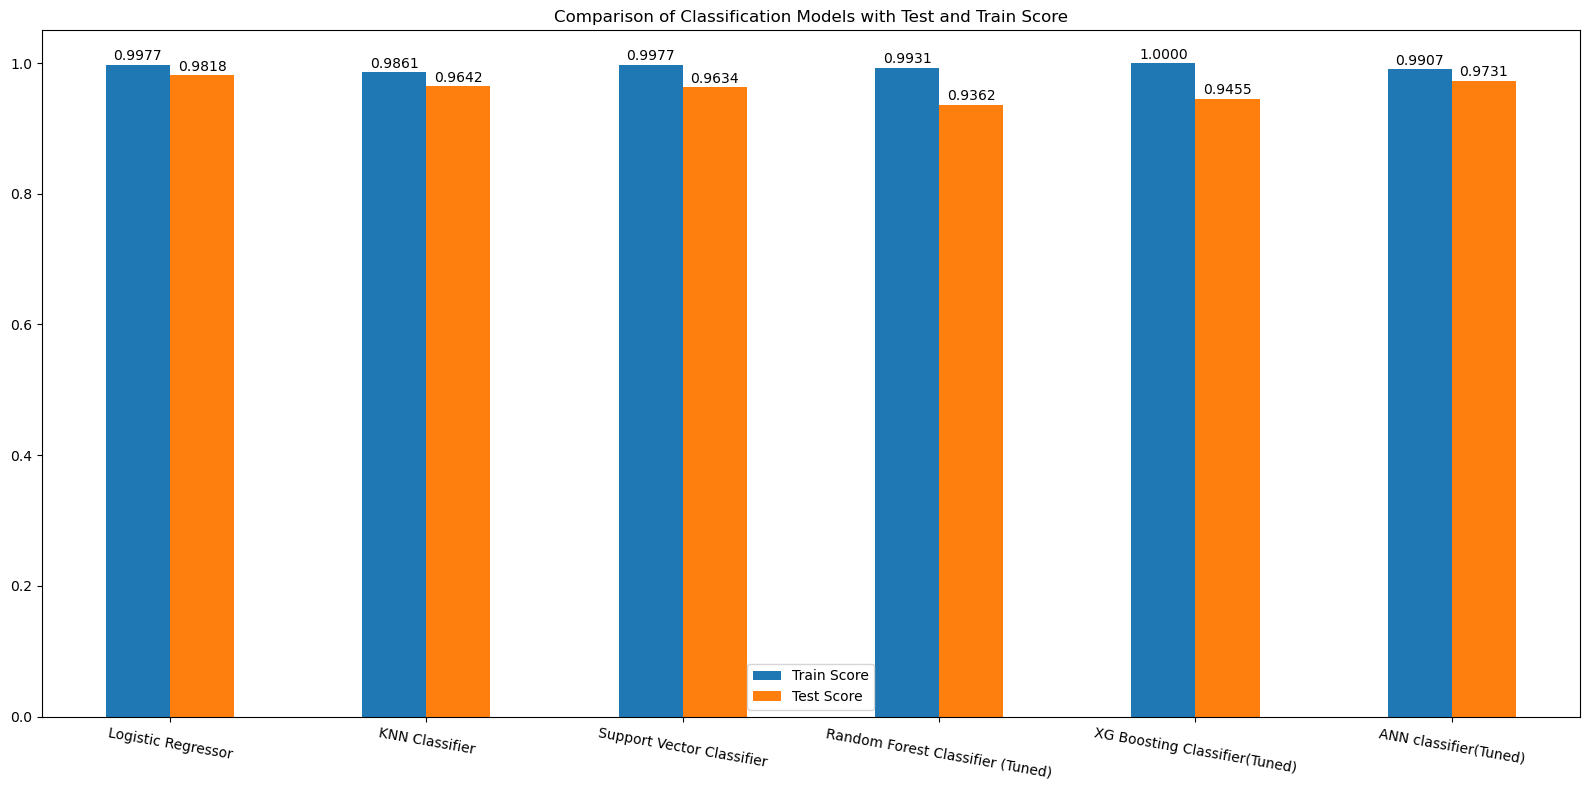

In [279]:
# Plotting Barplot for the Comparison
ax= Model_Comparison.plot(kind='bar', figsize=(16,8), xlabel="")
plt.title("Comparison of Classification Models with Test and Train Score")
plt.xticks(rotation=350)
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i, padding=1.0, fmt='%.4f')